<a href="https://colab.research.google.com/github/Marion13673/Analisis-ventas-por-tiendas/blob/main/AluraStoreLatam(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [46]:
from IPython.display import Javascript
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))


<IPython.core.display.Javascript object>

**INTRODUCCIÓN**

El Sr. Juan debe decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, se analizará datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

#1. Análisis de facturación



In [2]:
sum_tienda = tienda['Precio'].sum() # suma total de la columna precio en la tienda 1
Precio_fimal_tienda =f"{sum_tienda:,.0f}" # separación de los miles con comas

sum_tienda2 = tienda2['Precio'].sum()
Precio_fimal_tienda2 =f"{sum_tienda2:,.0f}"

sum_tienda3 = tienda3['Precio'].sum()
Precio_fimal_tienda3 =f"{sum_tienda3:,.0f}"

sum_tienda4 = tienda4['Precio'].sum()
Precio_fimal_tienda4 =f"{sum_tienda4:,.0f}"


print(f"Ingresos acumulados por ventas en la Tienda 1: {Precio_fimal_tienda}")
print(f"Ingresos acumulados por ventas en la Tienda 2: {Precio_fimal_tienda2}")
print(f"Ingresos acumulados por ventas en la Tienda 3: {Precio_fimal_tienda3}")
print(f"Ingresos acumulados por ventas en la Tienda 4: {Precio_fimal_tienda4}")


Ingresos acumulados por ventas en la Tienda 1: 1,150,880,400
Ingresos acumulados por ventas en la Tienda 2: 1,116,343,500
Ingresos acumulados por ventas en la Tienda 3: 1,098,019,600
Ingresos acumulados por ventas en la Tienda 4: 1,038,375,700


In [3]:
import pandas as pd
from IPython.display import display, HTML

# Prepare sum_tienda (Tienda 1)
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)
sum_tienda = tienda.groupby(tienda['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
porcentaje_tienda = (sum_tienda['Precio']/sum_tienda['Precio'].sum())*100.
sum_tienda['Porcentaje']=porcentaje_tienda.round(2)

sum_tienda.columns = ['Year', 'Ingresos por venta tienda 1', 'Porcentaje']
sum_tienda['Porcentaje']=sum_tienda['Porcentaje'].apply(lambda x: "{:,.2f}".format(x))

sum_tienda['Ingresos por venta tienda 1'] = sum_tienda['Ingresos por venta tienda 1'].apply(lambda x: "{:,}".format(int(x)))


# Prepare sum_tienda2 (Tienda 2)
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
sum_tienda2 = tienda2.groupby(tienda2['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
porcentaje_tienda2 = (sum_tienda2['Precio']/sum_tienda2['Precio'].sum())*100
sum_tienda2['Porcentaje']=porcentaje_tienda2.round(2)

sum_tienda2.columns = ['Year', 'Ingresos por venta tienda 2', 'Porcentaje']
sum_tienda2['Porcentaje']=sum_tienda2['Porcentaje'].apply(lambda x: "{:,.2f}".format(x))

sum_tienda2['Ingresos por venta tienda 2'] = sum_tienda2['Ingresos por venta tienda 2'].apply(lambda x: "{:,}".format(int(x)))

# Prepare sum_tienda3 (Tienda 3)
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
sum_tienda3 = tienda3.groupby(tienda3['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
porcentaje_tienda3 = (sum_tienda3['Precio']/sum_tienda3['Precio'].sum())*100
sum_tienda3['Porcentaje']=porcentaje_tienda3.round(2)

sum_tienda3.columns = ['Year', 'Ingresos por venta tienda 3', 'Porcentaje']
sum_tienda3['Porcentaje']=sum_tienda3['Porcentaje'].apply(lambda x: "{:,.2f}".format(x))

sum_tienda3['Ingresos por venta tienda 3'] = sum_tienda3['Ingresos por venta tienda 3'].apply(lambda x: "{:,}".format(int(x)))

# Prepare sum_tienda4 (Tienda 4)
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)
sum_tienda4 = tienda4.groupby(tienda4['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
porcentaje_tienda4 = (sum_tienda4['Precio']/sum_tienda4['Precio'].sum())*100
sum_tienda4['Porcentaje']=porcentaje_tienda4.round(2)

sum_tienda4.columns = ['Year', 'Ingresos por venta tienda 4', 'Porcentaje']
sum_tienda4['Porcentaje']=sum_tienda4['Porcentaje'].apply(lambda x: "{:,.2f}".format(x))

sum_tienda4['Ingresos por venta tienda 4'] = sum_tienda4['Ingresos por venta tienda 4'].apply(lambda x: "{:,}".format(int(x)))

# Display all tables side by side
html_content = f"""
<table style="display: inline-block; margin-right: 20px;">
    <caption><strong>Tienda 1</strong></caption>
    {sum_tienda.to_html(index=False)}
    </table>
<table style="display: inline-block; margin-right: 20px;">
    <caption><strong>Tienda 2</strong></caption>
    {sum_tienda2.to_html(index=False)}
</table>
<table style="display: inline-block; margin-right: 20px;">
    <caption><strong>Tienda 3</strong></caption>
    {sum_tienda3.to_html(index=False)}
</table>
<table style="display: inline-block;">
    <caption><strong>Tienda 4</strong></caption>
    {sum_tienda4.to_html(index=False)}
</table>
"""
display(HTML(html_content))

Year,Ingresos por venta tienda 1,Porcentaje
2020,"368,933,200",32.06
2021,"362,120,800",31.46
2022,"316,565,600",27.51
2023,"103,260,800",8.97
Year,Ingresos por venta tienda 2,Porcentaje
2020,"320,466,600",28.71
2021,"351,215,500",31.46
2022,"358,226,500",32.09
2023,"86,434,900",7.74
Year,Ingresos por venta tienda 3,Porcentaje


In [4]:
print('ANÁLISIS DE FACTURACIÓN POR TIENDA\n')
print('De acuerdo a los ingresos totales:\n')
print('En el año 2020 la tienda 1 obtuvo el mayor ingreso.')
print('En el año 2021 la tienda 3 obtuvo el mayor ingreso.')
print('En el año 2022 la tienda 2 obtuvo el mayor ingreso.')
print('En el año 2023 la tienda 1 obtuvo el mayor ingreso.\n')
print('La tienda 2 los ingresos por venta aumentaron año a año')
print('La tienda 1 los ingresos por venta disminuyeron año a año\n')
print('En el año 2022 la tienda 4 obtuvo menos ingresos con 22,7% del total de las ventas en las 4 tiendas,\ny para marzo 2023 es la que menos ingresos por ventas tiene con un 18.54% del total.')


ANÁLISIS DE FACTURACIÓN POR TIENDA

De acuerdo a los ingresos totales:

En el año 2020 la tienda 1 obtuvo el mayor ingreso.
En el año 2021 la tienda 3 obtuvo el mayor ingreso.
En el año 2022 la tienda 2 obtuvo el mayor ingreso.
En el año 2023 la tienda 1 obtuvo el mayor ingreso.

La tienda 2 los ingresos por venta aumentaron año a año
La tienda 1 los ingresos por venta disminuyeron año a año

En el año 2022 la tienda 4 obtuvo menos ingresos con 22,7% del total de las ventas en las 4 tiendas,
y para marzo 2023 es la que menos ingresos por ventas tiene con un 18.54% del total.


Nota: El año 2023 se presenta hasta marzo, los otros años están hasta diciembre


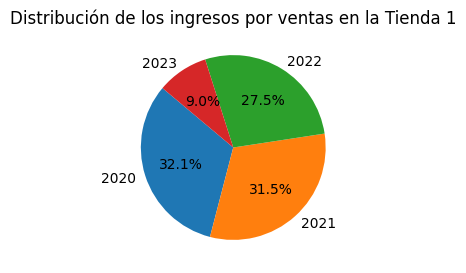

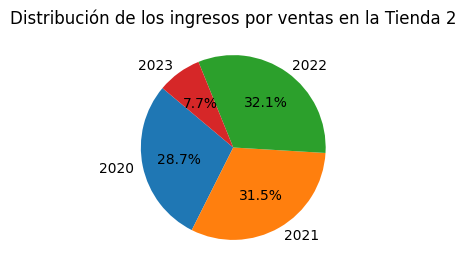

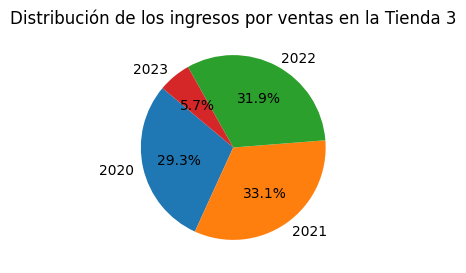

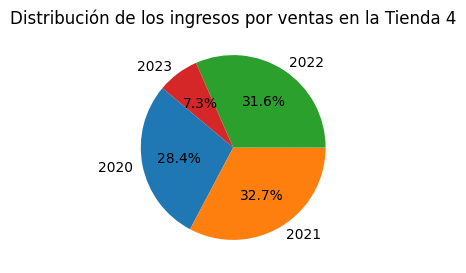

LA TENDENCIA ANUAL QUE MUESTRA LOS GRÁFICOS RESPECTO A LOS INGRESOS POR VENTAS

TIENDA 1: Disminuyó los ingresos por venta durante los años 2020,2021 y 2022
TIENDA 2: Aumentó las ingresos por venta durante los años 2020,2021 y 2022
TIENDA 3: Aumentó los ingresos por venta en el año 2021
TIENDA 4: Aumentó los ingresos por venta en el año 2021


In [5]:

import matplotlib.pyplot as plt

sum_tienda = tienda.groupby(tienda['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
fecha= sum_tienda['Fecha de Compra']
values = sum_tienda['Precio'].values

# Crear el gráfico de torta
plt.figure(figsize=(6,3))
plt.pie(values, labels=fecha, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los ingresos por ventas en la Tienda 1')
Nota = print('Nota: El año 2023 se presenta hasta marzo, los otros años están hasta diciembre')
plt.show()

import matplotlib.pyplot as plt

sum_tienda2 = tienda2.groupby(tienda2['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
fecha= sum_tienda2['Fecha de Compra']
values = sum_tienda2['Precio'].values

# Crear el gráfico de torta
plt.figure(figsize=(6,3))
plt.pie(values, labels=fecha, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los ingresos por ventas en la Tienda 2')
plt.show()


import matplotlib.pyplot as plt

sum_tienda3 = tienda3.groupby(tienda3['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
fecha= sum_tienda3['Fecha de Compra']
values = sum_tienda3['Precio'].values

# Crear el gráfico de torta
plt.figure(figsize=(6,3))
plt.pie(values, labels=fecha, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los ingresos por ventas en la Tienda 3')
plt.show()


import matplotlib.pyplot as plt

sum_tienda4 = tienda4.groupby(tienda3['Fecha de Compra'].dt.year)['Precio'].sum().reset_index()
fecha= sum_tienda4['Fecha de Compra']
values = sum_tienda4['Precio'].values

# Crear el gráfico de torta
plt.figure(figsize=(6,3))
plt.pie(values, labels=fecha, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los ingresos por ventas en la Tienda 4')
plt.show()

print('LA TENDENCIA ANUAL QUE MUESTRA LOS GRÁFICOS RESPECTO A LOS INGRESOS POR VENTAS\n')
print('TIENDA 1: Disminuyó los ingresos por venta durante los años 2020,2021 y 2022')
print('TIENDA 2: Aumentó las ingresos por venta durante los años 2020,2021 y 2022')
print('TIENDA 3: Aumentó los ingresos por venta en el año 2021')
print('TIENDA 4: Aumentó los ingresos por venta en el año 2021')


# 2. Ventas por categoría

In [6]:
import pandas as pd


tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)


tienda['Año'] = tienda['Fecha de Compra'].dt.year


ventas_por_categoria_tienda1 = tienda.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda1 = ventas_por_categoria_tienda1.rename(columns={'Precio': 'Ingresos_por_ventas1'})

Ingreso_prom_venta1 = tienda.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta1 = Ingreso_prom_venta1.rename(columns={'Precio': 'Ingreso_prom_venta1'})

cantidades_tienda1 = tienda.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda1')


merged_data = pd.merge(ventas_por_categoria_tienda1, cantidades_tienda1, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta1, on=['Año', 'Categoría del Producto'])


merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas1'], ascending=[True, False])


final_data = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_row = pd.DataFrame({
        'Year': [year],
        'Categoría del Producto': ['Total'],
        'Ingresos_por_ventas1': [''],
        'cantidades_tienda1': [year_data['cantidades_tienda1'].sum()],
        'Ingreso_prom_venta1': ['']
    })
    final_data.append(pd.concat([year_data, total_row]))


final_data = pd.concat(final_data, ignore_index=True)


final_data['Ingresos_por_ventas1'] = final_data['Ingresos_por_ventas1'].apply(lambda x: "{:,}".format(int(x)) if x != '' else x)
final_data['Ingreso_prom_venta1'] = final_data['Ingreso_prom_venta1'].apply(lambda x: "{:,.0f}".format(x) if x != '' else x)


final_data = final_data[['Año', 'Categoría del Producto', 'Ingresos_por_ventas1', 'cantidades_tienda1', 'Ingreso_prom_venta1']]


print('\nTIENDA 1\n')
(final_data)


TIENDA 1



,Año,Categoría del Producto,Ingresos_por_ventas1,cantidades_tienda1,Ingreso_prom_venta1
0,2020.0,Electrodomésticos,"136,132,300",111,"1,226,417"
1,2020.0,Electrónicos,"129,728,600",127,"1,021,485"
2,2020.0,Muebles,"50,778,700",127,"399,832"
3,2020.0,Instrumentos musicales,"26,174,700",51,"513,229"
4,2020.0,Deportes y diversión,"13,525,100",88,"153,694"
5,2020.0,Juguetes,"5,147,000",96,"53,615"
6,2020.0,Artículos para el hogar,"4,566,900",59,"77,405"
7,2020.0,Libros,"2,879,900",56,"51,427"
8,NaN,Total,,715,
9,2021.0,Electrónicos,"145,941,800",152,"960,143"




La tendencia en los ingresos por ventas para las categorías: electrónicos, muebles y electrodmésticos fue a la disminución para el 2021 y 2022.
La categoría con mayor ingresos por venta fueron los electrónicos.
La categoría con menor ingresos por venta fueron los libros.



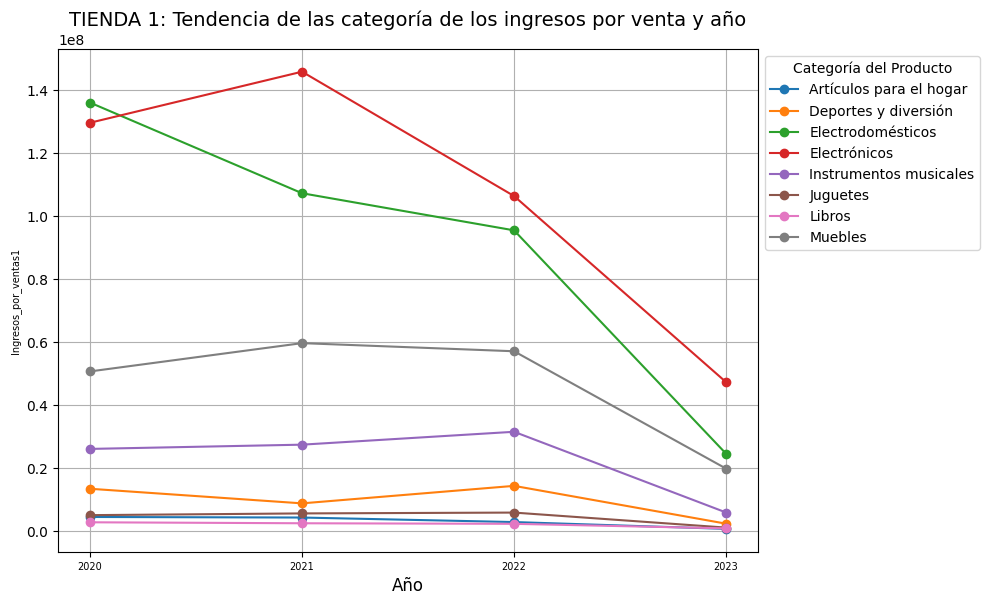



La tendencia en las cantidades vendidas para las categorías: instrumentos musicales, deportes y diversión fue al aumento para el 2021 y 2022.
Cantidad con mayor venta fueron los muebles para los 3 años.
Cantidad con menor venta fueron los instrumentos musicales 2020.
Cantidad con menor venta fueron los libros 2021 y 2022.


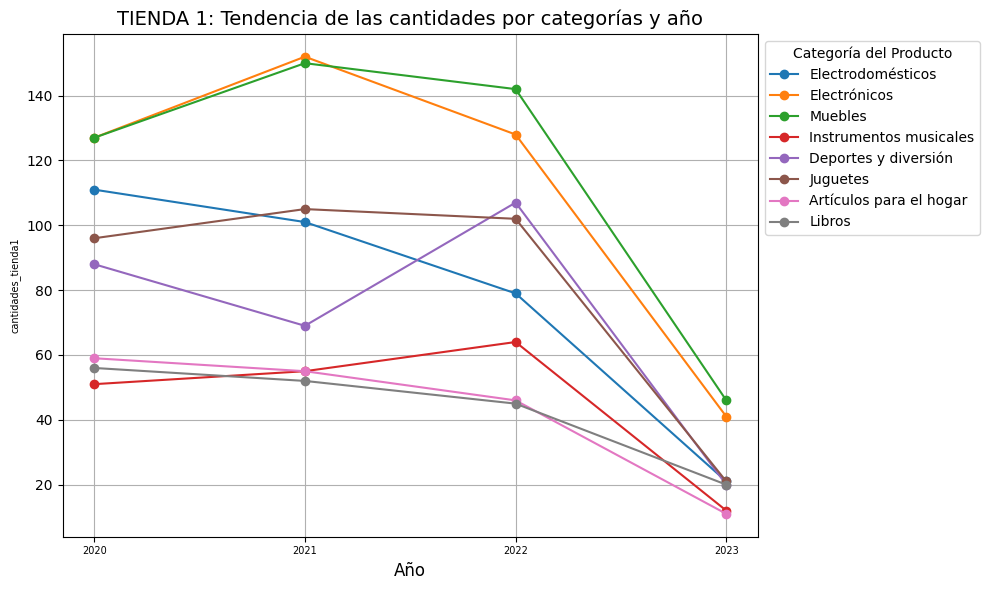

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)


tienda['Año'] = tienda['Fecha de Compra'].dt.year


ventas_por_categoria_tienda1 = tienda.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda1 = ventas_por_categoria_tienda1.rename(columns={'Precio': 'Ingresos_por_ventas1'})

# Recreating merged_data to include 'Año' and 'Ingresos_por_ventas1' for sorting

# Assuming Ingreso_prom_venta1 and cantidades_tienda1 are still available from the previous cell
# If not, you need to recalculate them here

Ingreso_prom_venta1 = tienda.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta1 = Ingreso_prom_venta1.rename(columns={'Precio': 'Ingreso_prom_venta1'})

cantidades_tienda1 = tienda.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda1')

merged_data = pd.merge(ventas_por_categoria_tienda1, cantidades_tienda1, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta1, on=['Año', 'Categoría del Producto'])


merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas1'], ascending=[True, False])

# Create the timeline chart
plt.figure(figsize=(10, 6))

# Plot each product category's timeline in sorted order
for categoria in ventas_por_categoria_tienda1['Categoría del Producto'].unique(): # loop through categories
    data = ventas_por_categoria_tienda1[ventas_por_categoria_tienda1['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Ingresos_por_ventas1'], marker='o', label=categoria)

# Add labels, title, and sorted legend
plt.title('TIENDA 1: Tendencia de las categoría de los ingresos por venta y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos_por_ventas1', fontsize=7)
plt.xticks(ventas_por_categoria_tienda1['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)

# Move the legend outside of the chart
plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement

# Adjust the layout to fit the chart and legend
plt.tight_layout()

print('\n\nLa tendencia en los ingresos por ventas para las categorías: electrónicos, muebles y electrodmésticos fue a la disminución para el 2021 y 2022.')
print('La categoría con mayor ingresos por venta fueron los electrónicos.')
print('La categoría con menor ingresos por venta fueron los libros.\n')
# Show the chart
plt.show()




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)


tienda['Año'] = tienda['Fecha de Compra'].dt.year


ventas_por_categoria_tienda1 = tienda.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda1 = ventas_por_categoria_tienda1.rename(columns={'Precio': 'Ingresos_por_ventas1'})

# Recreating merged_data to include 'Año' and 'Ingresos_por_ventas1' for sorting

# Assuming Ingreso_prom_venta1 and cantidades_tienda1 are still available from the previous cell
# If not, you need to recalculate them here

Ingreso_prom_venta1 = tienda.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta1 = Ingreso_prom_venta1.rename(columns={'Precio': 'Ingreso_prom_venta1'})

cantidades_tienda1 = tienda.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda1')

merged_data = pd.merge(ventas_por_categoria_tienda1, cantidades_tienda1, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta1, on=['Año', 'Categoría del Producto'])


merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas1'], ascending=[True, False])

# Create the timeline chart
plt.figure(figsize=(10, 6))

# Plot each product category's timeline in sorted order
for categoria in merged_data['Categoría del Producto'].unique(): # loop through categories
    data = merged_data[merged_data['Categoría del Producto'] == categoria] # Use merged_data which contains 'cantidades_tienda1'
    plt.plot(data['Año'], data['cantidades_tienda1'], marker='o', label=categoria)

# Add labels, title, and sorted legend
plt.title('TIENDA 1: Tendencia de las cantidades por categorías y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('cantidades_tienda1', fontsize=7)
plt.xticks(cantidades_tienda1['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)

# Move the legend outside of the chart
plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement

# Adjust the layout to fit the chart and legend
plt.tight_layout()

print('\n\nLa tendencia en las cantidades vendidas para las categorías: instrumentos musicales, deportes y diversión fue al aumento para el 2021 y 2022.')
print('Cantidad con mayor venta fueron los muebles para los 3 años.')
print('Cantidad con menor venta fueron los instrumentos musicales 2020.')
print('Cantidad con menor venta fueron los libros 2021 y 2022.')


# Show the chart
plt.show()

In [45]:
import pandas as pd


tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)


tienda2['Año'] = tienda2['Fecha de Compra'].dt.year


ventas_por_categoria_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda2 = ventas_por_categoria_tienda2.rename(columns={'Precio': 'Ingresos_por_ventas2'})

Ingreso_prom_venta2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta2 = Ingreso_prom_venta2.rename(columns={'Precio': 'Ingreso_prom_venta2'})

cantidades_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda2')


merged_data = pd.merge(ventas_por_categoria_tienda2, cantidades_tienda2, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta2, on=['Año', 'Categoría del Producto'])

merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas2'], ascending=[True, False])

# se añade el total de fila para cada año
final_data = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_row = pd.DataFrame({
        'Year': [year],
        'Categoría del Producto': ['Total'],
        'Ingresos_por_ventas2': [''],
        'cantidades_tienda2': [year_data['cantidades_tienda2'].sum()],
        'Ingreso_prom_venta2': ['']
    })
    final_data.append(pd.concat([year_data, total_row]))

final_data = pd.concat(final_data, ignore_index=True)

final_data['Ingresos_por_ventas2'] = final_data['Ingresos_por_ventas2'].apply(lambda x: "{:,}".format(int(x)) if x != '' else x)
final_data['Ingreso_prom_venta2'] = final_data['Ingreso_prom_venta2'].apply(lambda x: "{:,.0f}".format(x) if x != '' else x)

final_data = final_data[['Año', 'Categoría del Producto', 'Ingresos_por_ventas2', 'cantidades_tienda2', 'Ingreso_prom_venta2']]


print('\nTIENDA 2\n')
(final_data)


TIENDA 2



,Año,Categoría del Producto,Ingresos_por_ventas2,cantidades_tienda2,Ingreso_prom_venta2
0,2020.0,Electrodomésticos,"112,443,300",95,"1,183,614"
1,2020.0,Electrónicos,"105,710,100",117,"903,505"
2,2020.0,Muebles,"53,593,000",129,"415,450"
3,2020.0,Instrumentos musicales,"25,465,800",57,"446,768"
4,2020.0,Deportes y diversión,"11,304,900",83,"136,204"
5,2020.0,Artículos para el hogar,"4,677,400",58,"80,645"
6,2020.0,Juguetes,"3,967,800",95,"41,766"
7,2020.0,Libros,"3,304,300",66,"50,065"
8,NaN,Total,,700,
9,2021.0,Electrónicos,"128,888,100",141,"914,100"




La tendencia en los ingresos por ventas para las categorías: electrodomésticos, deporte y diversión fue a la disminución para el 2021 y 2022.
La categoría con mayor ingresos por venta fueron los electrónicos.
La categoría con menor ingresos por venta fueron los libros.



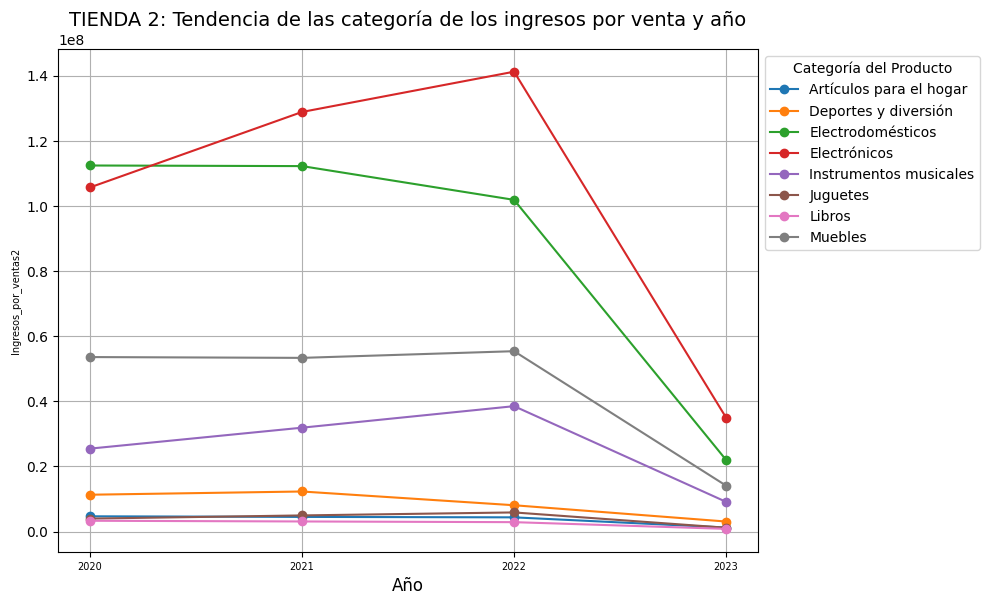



La tendencia en las cantidades vendidas para las categorías: muebles fue al aumento para el 2021 y 2022.
Cantidad con mayor venta fueron los muebles para el 2020 y el 2022.
Cantidad con menor venta fueron los artículos para el hogar.


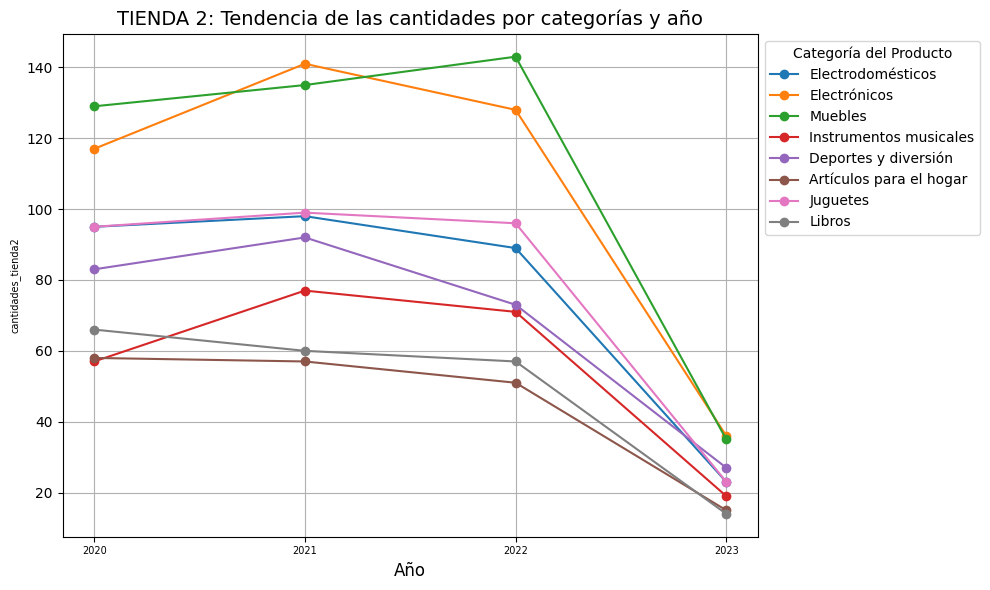

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)


tienda2['Año'] = tienda2['Fecha de Compra'].dt.year


ventas_por_categoria_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda2 = ventas_por_categoria_tienda2.rename(columns={'Precio': 'Ingresos_por_ventas2'})

Ingreso_prom_venta2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta2 = Ingreso_prom_venta2.rename(columns={'Precio': 'Ingreso_prom_venta2'})

cantidades_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda2')

merged_data = pd.merge(ventas_por_categoria_tienda2, cantidades_tienda2, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta2, on=['Año', 'Categoría del Producto'])

merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas2'], ascending=[True, False])


plt.figure(figsize=(10, 6))

for categoria in ventas_por_categoria_tienda2['Categoría del Producto'].unique(): # loop through categories
    data = ventas_por_categoria_tienda2[ventas_por_categoria_tienda2['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Ingresos_por_ventas2'], marker='o', label=categoria)


plt.title('TIENDA 2: Tendencia de las categoría de los ingresos por venta y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos_por_ventas2', fontsize=7)
plt.xticks(ventas_por_categoria_tienda2['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement


plt.tight_layout()

print('\n\nLa tendencia en los ingresos por ventas para las categorías: electrodomésticos, deporte y diversión fue a la disminución para el 2021 y 2022.')
print('La categoría con mayor ingresos por venta fueron los electrónicos.')
print('La categoría con menor ingresos por venta fueron los libros.\n')
# Show the chart
plt.show()




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)


tienda2['Año'] = tienda2['Fecha de Compra'].dt.year


ventas_por_categoria_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda2 = ventas_por_categoria_tienda2.rename(columns={'Precio': 'Ingresos_por_ventas2'})


Ingreso_prom_venta2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta2 = Ingreso_prom_venta2.rename(columns={'Precio': 'Ingreso_prom_venta2'})

cantidades_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda2')

merged_data = pd.merge(ventas_por_categoria_tienda2, cantidades_tienda2, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta2, on=['Año', 'Categoría del Producto'])


merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas2'], ascending=[True, False])


plt.figure(figsize=(10, 6))


for categoria in merged_data['Categoría del Producto'].unique():
    data = merged_data[merged_data['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['cantidades_tienda2'], marker='o', label=categoria)


plt.title('TIENDA 2: Tendencia de las cantidades por categorías y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('cantidades_tienda2', fontsize=7)
plt.xticks(cantidades_tienda2['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

print('\n\nLa tendencia en las cantidades vendidas para las categorías: muebles fue al aumento para el 2021 y 2022.')
print('Cantidad con mayor venta fueron los muebles para el 2020 y el 2022.')
print('Cantidad con menor venta fueron los artículos para el hogar.')

plt.show()

In [44]:
import pandas as pd


tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)

tienda3['Año'] = tienda3['Fecha de Compra'].dt.year

ventas_por_categoria_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda3 = ventas_por_categoria_tienda3.rename(columns={'Precio': 'Ingresos_por_ventas3'})

Ingreso_prom_venta3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta3 = Ingreso_prom_venta3.rename(columns={'Precio': 'Ingreso_prom_venta3'})

cantidades_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda3')


merged_data = pd.merge(ventas_por_categoria_tienda3, cantidades_tienda3, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta3, on=['Año', 'Categoría del Producto'])

merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas3'], ascending=[True, False])

# se añade el total de fila para cada año
final_data = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_row = pd.DataFrame({
        'Year': [year],
        'Categoría del Producto': ['Total'],
        'Ingresos_por_ventas3': [''],
        'cantidades_tienda3': [year_data['cantidades_tienda3'].sum()],
        'Ingreso_prom_venta3': ['']
    })
    final_data.append(pd.concat([year_data, total_row]))

final_data = pd.concat(final_data, ignore_index=True)

final_data['Ingresos_por_ventas3'] = final_data['Ingresos_por_ventas3'].apply(lambda x: "{:,}".format(int(x)) if x != '' else x)
final_data['Ingreso_prom_venta3'] = final_data['Ingreso_prom_venta3'].apply(lambda x: "{:,.0f}".format(x) if x != '' else x)

final_data = final_data[['Año', 'Categoría del Producto', 'Ingresos_por_ventas3', 'cantidades_tienda3', 'Ingreso_prom_venta3']]


print('\nTIENDA 3\n')
(final_data)


TIENDA 3



,Año,Categoría del Producto,Ingresos_por_ventas3,cantidades_tienda3,Ingreso_prom_venta3
0,2020.0,Electrónicos,"124,495,300",129,"965,080"
1,2020.0,Electrodomésticos,"94,273,200",85,"1,109,096"
2,2020.0,Muebles,"63,217,900",156,"405,243"
3,2020.0,Instrumentos musicales,"17,771,000",44,"403,886"
4,2020.0,Deportes y diversión,"9,898,700",86,"115,101"
5,2020.0,Juguetes,"5,449,600",96,"56,767"
6,2020.0,Artículos para el hogar,"4,028,900",55,"73,253"
7,2020.0,Libros,"2,572,900",50,"51,458"
8,NaN,Total,,701,
9,2021.0,Electrónicos,"131,232,900",146,"898,855"




La tendencia en los ingresos por ventas para las categorías: electrónicos fue al aumento desde 2020 al 2022.
La categoría con mayor ingresos por venta fueron los electrónicos.
La categoría con menor ingresos por venta fueron los libros.



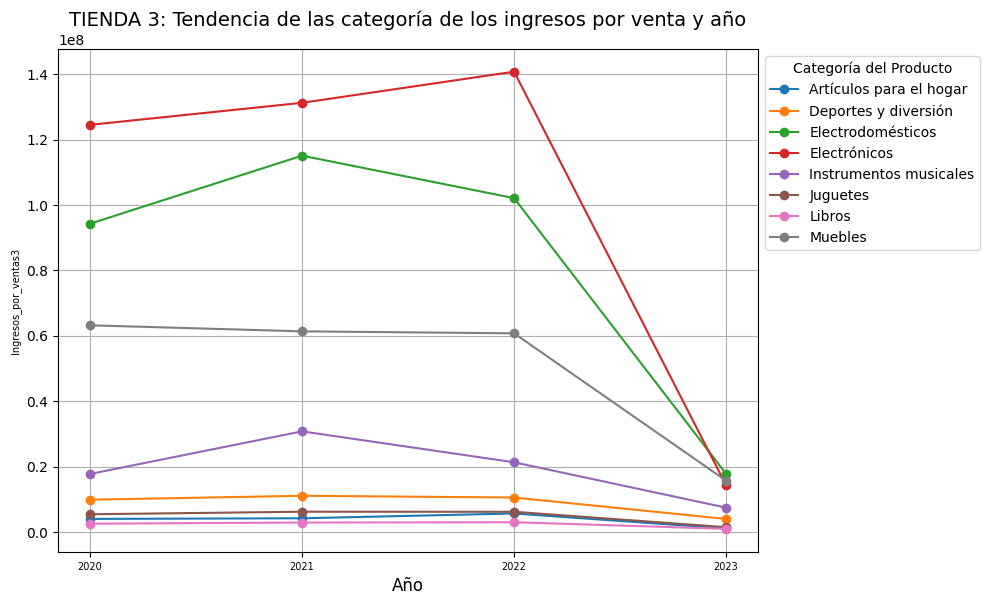



La tendencia en las cantidades vendidas para las categorías: electrónicos, artículos para el hogar, deportes y diversión fue al aumento para el 2021 y 2022.
Cantidad con mayor venta fueron los muebles desde el 2020 al 2022.
Cantidad con menor venta fueron los artículos para el hogar y los instrumentos musicales.


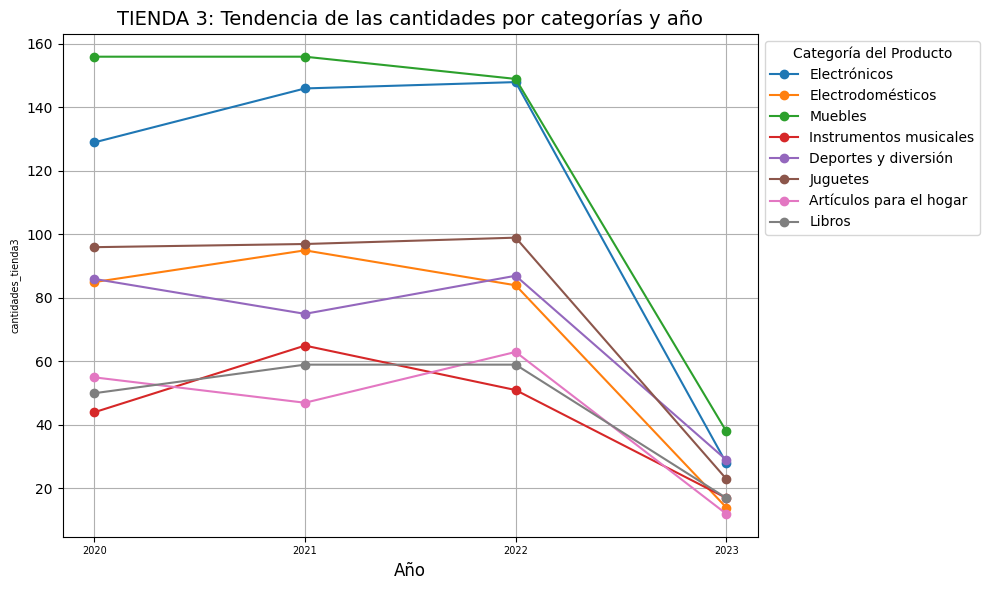

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)


tienda3['Año'] = tienda3['Fecha de Compra'].dt.year


ventas_por_categoria_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda3 = ventas_por_categoria_tienda3.rename(columns={'Precio': 'Ingresos_por_ventas3'})

Ingreso_prom_venta3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta3 = Ingreso_prom_venta3.rename(columns={'Precio': 'Ingreso_prom_venta3'})

cantidades_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda3')

merged_data = pd.merge(ventas_por_categoria_tienda3, cantidades_tienda3, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta3, on=['Año', 'Categoría del Producto'])

merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas3'], ascending=[True, False])


plt.figure(figsize=(10, 6))

for categoria in ventas_por_categoria_tienda3['Categoría del Producto'].unique(): # loop through categories
    data = ventas_por_categoria_tienda3[ventas_por_categoria_tienda3['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Ingresos_por_ventas3'], marker='o', label=categoria)


plt.title('TIENDA 3: Tendencia de las categoría de los ingresos por venta y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos_por_ventas3', fontsize=7)
plt.xticks(ventas_por_categoria_tienda3['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement


plt.tight_layout()

print('\n\nLa tendencia en los ingresos por ventas para las categorías: electrónicos fue al aumento desde 2020 al 2022.')
print('La categoría con mayor ingresos por venta fueron los electrónicos.')
print('La categoría con menor ingresos por venta fueron los libros.\n')
# Show the chart
plt.show()




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)


tienda3['Año'] = tienda3['Fecha de Compra'].dt.year


ventas_por_categoria_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda3 = ventas_por_categoria_tienda3.rename(columns={'Precio': 'Ingresos_por_ventas3'})


Ingreso_prom_venta3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta3 = Ingreso_prom_venta3.rename(columns={'Precio': 'Ingreso_prom_venta3'})

cantidades_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda3')

merged_data = pd.merge(ventas_por_categoria_tienda3, cantidades_tienda3, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta3, on=['Año', 'Categoría del Producto'])


merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas3'], ascending=[True, False])


plt.figure(figsize=(10, 6))


for categoria in merged_data['Categoría del Producto'].unique():
    data = merged_data[merged_data['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['cantidades_tienda3'], marker='o', label=categoria)


plt.title('TIENDA 3: Tendencia de las cantidades por categorías y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('cantidades_tienda3', fontsize=7)
plt.xticks(cantidades_tienda3['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

print('\n\nLa tendencia en las cantidades vendidas para las categorías: electrónicos, artículos para el hogar, deportes y diversión fue al aumento para el 2021 y 2022.')
print('Cantidad con mayor venta fueron los muebles desde el 2020 al 2022.')
print('Cantidad con menor venta fueron los artículos para el hogar y los instrumentos musicales.')

plt.show()

In [10]:
import pandas as pd


tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)


tienda4['Año'] = tienda4['Fecha de Compra'].dt.year


ventas_por_categoria_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda4 = ventas_por_categoria_tienda4.rename(columns={'Precio': 'Ingresos_por_ventas4'})

Ingreso_prom_venta4 = tienda4.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta4 = Ingreso_prom_venta4.rename(columns={'Precio': 'Ingreso_prom_venta4'})

cantidades_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda4')


merged_data = pd.merge(ventas_por_categoria_tienda4, cantidades_tienda4, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta4, on=['Año', 'Categoría del Producto'])

merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas4'], ascending=[True, False])

# se añade el total de fila para cada año
final_data = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_row = pd.DataFrame({
        'Year': [year],
        'Categoría del Producto': ['Total'],
        'Ingresos_por_ventas4': [''],
        'cantidades_tienda4': [year_data['cantidades_tienda4'].sum()],
        'Ingreso_prom_venta4': ['']
    })
    final_data.append(pd.concat([year_data, total_row]))

final_data = pd.concat(final_data, ignore_index=True)

final_data['Ingresos_por_ventas4'] = final_data['Ingresos_por_ventas4'].apply(lambda x: "{:,}".format(int(x)) if x != '' else x)
final_data['Ingreso_prom_venta4'] = final_data['Ingreso_prom_venta4'].apply(lambda x: "{:,.0f}".format(x) if x != '' else x)

final_data = final_data[['Año', 'Categoría del Producto', 'Ingresos_por_ventas4', 'cantidades_tienda4', 'Ingreso_prom_venta4']]


print('\nTIENDA 4\n')
(final_data)



TIENDA 4



,Año,Categoría del Producto,Ingresos_por_ventas4,cantidades_tienda4,Ingreso_prom_venta4
0,2020.0,Electrónicos,"136,151,000",144,"945,493"
1,2020.0,Electrodomésticos,"80,890,500",74,"1,093,115"
2,2020.0,Muebles,"63,813,700",159,"401,344"
3,2020.0,Instrumentos musicales,"24,036,600",59,"407,400"
4,2020.0,Deportes y diversión,"11,101,200",82,"135,380"
5,2020.0,Juguetes,"7,389,000",107,"69,056"
6,2020.0,Artículos para el hogar,"4,575,600",59,"77,553"
7,2020.0,Libros,"2,890,100",61,"47,379"
8,NaN,Total,,745,
9,2021.0,Electrónicos,"153,352,000",159,"964,478"




La tendencia en los ingresos por ventas para las categorías: electrónicos fue al aumento desde 2020 al 2022.
La categoría con mayor ingresos por venta fueron los electrónicos.
La categoría con menor ingresos por venta fueron los libros.



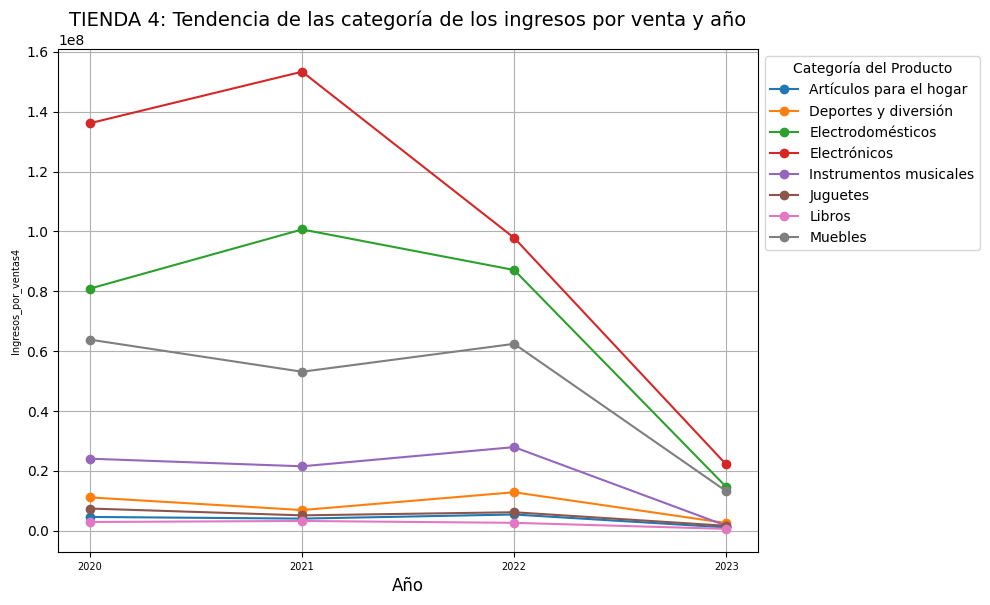



La tendencia en las cantidades vendidas para las categorías: muebles y artículos para el hogar fue al aumento para el 2021 y 2022.
Cantidad con mayor venta fueron los muebles para el 2020 y el 2022.
Cantidad con mayor venta fueron los electrónicos el 2021
Cantidad con menor venta fueron los instrumentos musicales.


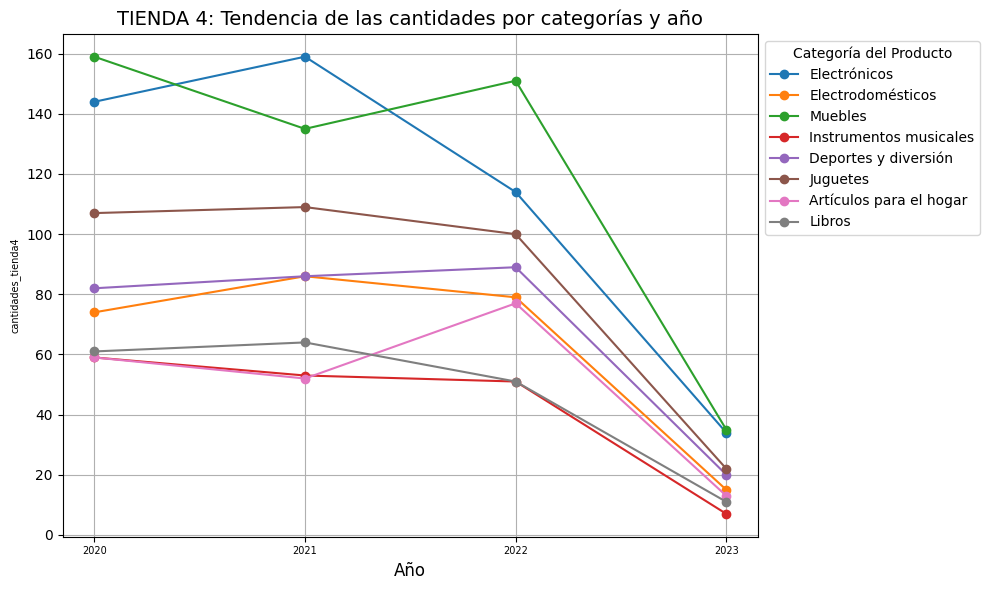

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)


tienda4['Año'] = tienda4['Fecha de Compra'].dt.year


ventas_por_categoria_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda4 = ventas_por_categoria_tienda4.rename(columns={'Precio': 'Ingresos_por_ventas4'})

Ingreso_prom_venta4= tienda4.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta4 = Ingreso_prom_venta4.rename(columns={'Precio': 'Ingreso_prom_venta4'})

cantidades_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda4')

merged_data = pd.merge(ventas_por_categoria_tienda4, cantidades_tienda4, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta4, on=['Año', 'Categoría del Producto'])

merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas4'], ascending=[True, False])


plt.figure(figsize=(10, 6))

for categoria in ventas_por_categoria_tienda4['Categoría del Producto'].unique(): # loop through categories
    data = ventas_por_categoria_tienda4[ventas_por_categoria_tienda4['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Ingresos_por_ventas4'], marker='o', label=categoria)


plt.title('TIENDA 4: Tendencia de las categoría de los ingresos por venta y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos_por_ventas4', fontsize=7)
plt.xticks(ventas_por_categoria_tienda4['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement


plt.tight_layout()

print('\n\nLa tendencia en los ingresos por ventas para las categorías: electrónicos fue al aumento desde 2020 al 2022.')
print('La categoría con mayor ingresos por venta fueron los electrónicos.')
print('La categoría con menor ingresos por venta fueron los libros.\n')
# Show the chart
plt.show()




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)


tienda4['Año'] = tienda4['Fecha de Compra'].dt.year


ventas_por_categoria_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto'])['Precio'].sum().reset_index()
ventas_por_categoria_tienda4 = ventas_por_categoria_tienda4.rename(columns={'Precio': 'Ingresos_por_ventas4'})


Ingreso_prom_venta4 = tienda4.groupby(['Año', 'Categoría del Producto'])['Precio'].mean().reset_index()
Ingreso_prom_venta4 = Ingreso_prom_venta4.rename(columns={'Precio': 'Ingreso_prom_venta4'})

cantidades_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto']).size().reset_index(name='cantidades_tienda4')

merged_data = pd.merge(ventas_por_categoria_tienda4, cantidades_tienda4, on=['Año', 'Categoría del Producto'])
merged_data = pd.merge(merged_data, Ingreso_prom_venta4, on=['Año', 'Categoría del Producto'])


merged_data = merged_data.sort_values(by=['Año', 'Ingresos_por_ventas4'], ascending=[True, False])


plt.figure(figsize=(10, 6))


for categoria in merged_data['Categoría del Producto'].unique():
    data = merged_data[merged_data['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['cantidades_tienda4'], marker='o', label=categoria)


plt.title('TIENDA 4: Tendencia de las cantidades por categorías y año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('cantidades_tienda4', fontsize=7)
plt.xticks(cantidades_tienda4['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

print('\n\nLa tendencia en las cantidades vendidas para las categorías: muebles y artículos para el hogar fue al aumento para el 2021 y 2022.')
print('Cantidad con mayor venta fueron los muebles para el 2020 y el 2022.')
print('Cantidad con mayor venta fueron los electrónicos el 2021')
print('Cantidad con menor venta fueron los instrumentos musicales.')

plt.show()

In [43]:

print('ANÁLISIS DE FACTURACIÓN POR CATEGORÍA\n')
print('La tabla muestra los ingresos de mayor a menor que han tenido cada categoría anualmente\npara las cuatro tiendas.\n')
print('La tendencia para todas las tiendas es que los electrónicos y electrodomésticos')
print('son los que más ingresos por ventas han tenido durante los años 2020 hasta marzo de 2023.')
print('La categoría con menos ingresos por ventas han sido los libros durante estos 3 años.')
print('Y la categoría más popular, que más veces se ha vendido ha sido los muebles.')

print('\nMAYOR INGRESOS ACUMULADO 2020-2023')
print('\nTIENDA 1 : Electrónicos y electrodomésticos: 793,178,700; 26.57%')
print('TIENDA 2 : Electrónicos y electrodomésticos: 759,398,900; 25.44%')
print('TIENDA 3 : Electrónicos y electrodomésticos: 740,013,700; 24.79%')
print('TIENDA 4 : Electrónicos y electrodomésticos: 692,736,300; 23.20%')

print('\nMENOR INGRESOS ACUMULADO 2020-2023')
print('\nTIENDA 1 : Artículos para el hogar y libros: 21,483,300; 0.72%')
print('TIENDA 2 : Artículos para el hogar y libros: 24,838,100; 0.83%')
print('TIENDA 3 : Artículos para el hogar y libros: 24,558,700; 0.82%')
print('TIENDA 4 : Artículos para el hogar y libros: 24,395,800; 0.82%')


print('\nLa tienda 4 ha tenido menos ingresos durante el 2020-2023 ')

ANÁLISIS DE FACTURACIÓN POR CATEGORÍA

La tabla muestra los ingresos de mayor a menor que han tenido cada categoría anualmente
para las cuatro tiendas.

La tendencia para todas las tiendas es que los electrónicos y electrodomésticos
son los que más ingresos por ventas han tenido durante los años 2020 hasta marzo de 2023.
La categoría con menos ingresos por ventas han sido los libros durante estos 3 años.
Y la categoría más popular, que más veces se ha vendido ha sido los muebles.

MAYOR INGRESOS ACUMULADO 2020-2023

TIENDA 1 : Electrónicos y electrodomésticos: 793,178,700; 26.57%
TIENDA 2 : Electrónicos y electrodomésticos: 759,398,900; 25.44%
TIENDA 3 : Electrónicos y electrodomésticos: 740,013,700; 24.79%
TIENDA 4 : Electrónicos y electrodomésticos: 692,736,300; 23.20%

MENOR INGRESOS ACUMULADO 2020-2023

TIENDA 1 : Artículos para el hogar y libros: 21,483,300; 0.72%
TIENDA 2 : Artículos para el hogar y libros: 24,838,100; 0.83%
TIENDA 3 : Artículos para el hogar y libros: 24,558,700

# 3. Calificación promedio de la tienda


In [42]:
import pandas as pd
import numpy as np


tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)
tienda['Año'] = tienda['Fecha de Compra'].dt.year
calificacion_promedio_tienda1=tienda.groupby('Año')['Calificación'].mean().round(2).reset_index()

Total_calificacion_prom_tienda1=tienda['Calificación'].mean().round(2)

tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
tienda2['Año'] = tienda2['Fecha de Compra'].dt.year
calificacion_promedio_tienda2=tienda2.groupby('Año')['Calificación'].mean().round(2).reset_index()

Total_calificacion_prom_tienda2=tienda2['Calificación'].mean().round(2)


tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year
calificacion_promedio_tienda3=tienda3.groupby('Año')['Calificación'].mean().round(2).reset_index()

Total_calificacion_prom_tienda3=tienda3['Calificación'].mean().round(2)

tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year
calificacion_promedio_tienda4=tienda4.groupby('Año')['Calificación'].mean().round(2).reset_index()

Total_calificacion_prom_tienda4=tienda4['Calificación'].mean().round(2)

print('')



print(calificacion_promedio_tienda1)
print(f'Total tienda 1   {Total_calificacion_prom_tienda1}\n')

print(calificacion_promedio_tienda2)
print(f'Total tienda 2   {Total_calificacion_prom_tienda2}\n')

print(calificacion_promedio_tienda3)
print(f'Total tienda 3   {Total_calificacion_prom_tienda3}\n')

print(calificacion_promedio_tienda4)
print(f'Total tienda 4   {Total_calificacion_prom_tienda4}\n')



    Año  Calificación
0  2020          3.93
1  2021          3.96
2  2022          4.04
3  2023          3.96
Total tienda 1   3.98

    Año  Calificación
0  2020          4.04
1  2021          4.00
2  2022          4.10
3  2023          3.96
Total tienda 2   4.04

    Año  Calificación
0  2020          4.12
1  2021          3.93
2  2022          4.09
3  2023          4.08
Total tienda 3   4.05

    Año  Calificación
0  2020          4.02
1  2021          3.96
2  2022          3.97
3  2023          4.17
Total tienda 4   4.0



In [41]:
import pandas as pd
import numpy as np



calificacion_promedio_tienda1=tienda.groupby('Categoría del Producto')['Calificación'].mean().round(2).reset_index()
Total_calificacion_prom_tienda1=tienda['Calificación'].mean().round(2)


calificacion_promedio_tienda2=tienda2.groupby('Categoría del Producto')['Calificación'].mean().round(2).reset_index()
Total_calificacion_prom_tienda2=tienda2['Calificación'].mean().round(2)


calificacion_promedio_tienda3=tienda3.groupby('Categoría del Producto')['Calificación'].mean().round(2).reset_index()
Total_calificacion_prom_tienda3=tienda3['Calificación'].mean().round(2)


calificacion_promedio_tienda4=tienda4.groupby('Categoría del Producto')['Calificación'].mean().round(2).reset_index()
Total_calificacion_prom_tienda4=tienda4['Calificación'].mean().round(2)

calificacion_promedio_tienda1 = calificacion_promedio_tienda1.sort_values(by='Calificación', ascending=False)
calificacion_promedio_tienda2 = calificacion_promedio_tienda2.sort_values(by='Calificación', ascending=False)
calificacion_promedio_tienda3 = calificacion_promedio_tienda3.sort_values(by='Calificación', ascending=False)
calificacion_promedio_tienda4 = calificacion_promedio_tienda4.sort_values(by='Calificación', ascending=False)

print('')



print(calificacion_promedio_tienda1)
print(f'                   TOTAL TIENDA 1   {Total_calificacion_prom_tienda1}\n')

print(calificacion_promedio_tienda2)
print(f'                   TOTAL TIENDA 2   {Total_calificacion_prom_tienda2}\n')

print(calificacion_promedio_tienda3)
print(f'                   TOTAL TIENDA 3   {Total_calificacion_prom_tienda3}\n')

print(calificacion_promedio_tienda4)
print(f'                   TOTAL TIENDA 4   {Total_calificacion_prom_tienda4}\n')


    Categoría del Producto  Calificación
5                 Juguetes          4.08
4   Instrumentos musicales          4.05
2        Electrodomésticos          4.03
3             Electrónicos          4.00
6                   Libros          3.98
7                  Muebles          3.95
1     Deportes y diversión          3.90
0  Artículos para el hogar          3.75
                   TOTAL TIENDA 1   3.98

    Categoría del Producto  Calificación
7                  Muebles          4.09
0  Artículos para el hogar          4.07
2        Electrodomésticos          4.07
1     Deportes y diversión          4.07
4   Instrumentos musicales          4.04
5                 Juguetes          4.03
3             Electrónicos          3.97
6                   Libros          3.95
                   TOTAL TIENDA 2   4.04

    Categoría del Producto  Calificación
5                 Juguetes          4.20
7                  Muebles          4.10
0  Artículos para el hogar          4.07
6            

In [14]:
print('ANÁLISIS DE LA CALIFICACIÓN PROMEDIO POR TIENDA\n')
print('La tienda 1 fue aumentando su califación año a año pero su promedio total es el más bajo de las 4 tiendas 3.98.')
print('La tienda 4 fue disminuyendo su calificación año a año pero su promedio total es 4.')
print('Desde enero a marzo de 2023 la tienda 1 y la tienda 2 tienen la calificación más baja 3.96.\n')
print('Cabe destacar que los electrodomésticos y eléctronicos no son los mejores calificados en las 4 tiendas.\n')
print('Las categorías mejores evaluados son:\n')
print('TIENDA 1 : Juguetes')
print('TIENDA 2 : Muebles')
print('TIENDA 3 : Juguetes')
print('TIENDA 4 : Deportes y diversión\n')
print('Los peores evaluados son:\n')
print('TIENDA 1 : Artículos para el hogar')
print('TIENDA 2 : Libros')
print('TIENDA 3 : Deportes y diversión')
print('TIENDA 4 : Instrumentos musicales')

ANÁLISIS DE LA CALIFICACIÓN PROMEDIO POR TIENDA

La tienda 1 fue aumentando su califación año a año pero su promedio total es el más bajo de las 4 tiendas 3.98.
La tienda 4 fue disminuyendo su calificación año a año pero su promedio total es 4.
Desde enero a marzo de 2023 la tienda 1 y la tienda 2 tienen la calificación más baja 3.96.

Cabe destacar que los electrodomésticos y eléctronicos no son los mejores calificados en las 4 tiendas.

Las categorías mejores evaluados son:

TIENDA 1 : Juguetes
TIENDA 2 : Muebles
TIENDA 3 : Juguetes
TIENDA 4 : Deportes y diversión

Los peores evaluados son:

TIENDA 1 : Artículos para el hogar
TIENDA 2 : Libros
TIENDA 3 : Deportes y diversión
TIENDA 4 : Instrumentos musicales


# 4. Productos más y menos vendidos

In [13]:
import pandas as pd

# Crear una función para calcular ingresos máximos, mínimos, promedios, y agregar información adicional
def analizar_ingresos(tienda):
    try:
        # Convertir 'Fecha de Compra' en formato de fecha y extraer el año
        tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)
        tienda['Año'] = tienda['Fecha de Compra'].dt.year

        # Agrupar por año y producto para calcular métricas
        ingresos_por_producto = tienda.groupby(['Año', 'Producto', 'Categoría del Producto']).agg({
            'Precio': ['sum', 'mean'],  # Total y promedio de ingresos por producto
            'Producto': 'size'          # Número de productos vendidos
        })

        # Ajustar nombres de columnas
        ingresos_por_producto.columns = ['Ingresos', 'Ingreso_Promedio', 'Cantidad_del_Producto']
        ingresos_por_producto = ingresos_por_producto.reset_index()

        resultados = []  # Lista para guardar resultados

        # Iterar sobre los años únicos
        for anio in ingresos_por_producto['Año'].unique():
            datos_anio = ingresos_por_producto[ingresos_por_producto['Año'] == anio]

            # Verificar que haya datos disponibles para el año
            if not datos_anio.empty:
                # Producto con el ingreso máximo
                max_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmax()].copy()
                max_ingreso['Tipo'] = 'Máximo'
                resultados.append(max_ingreso)

                # Producto con el ingreso mínimo
                min_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmin()].copy()
                min_ingreso['Tipo'] = 'Mínimo'
                resultados.append(min_ingreso)

        # Convertir resultados en DataFrame
        resultados_df = pd.DataFrame(resultados)

        # Formatear los valores de 'Ingresos', 'Ingreso_Promedio', y 'Cantidad_del_Producto' con comas
        resultados_df['Ingresos'] = resultados_df['Ingresos'].apply(lambda x: "{:,}".format(int(x)))
        resultados_df['Ingreso_Promedio'] = resultados_df['Ingreso_Promedio'].apply(lambda x: "{:,.2f}".format(float(x)))
        resultados_df['Cantidad_del_Producto'] = resultados_df['Cantidad_del_Producto'].apply(lambda x: "{:,}".format(int(x)))

        return resultados_df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Configurar opciones de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)       # Establece el ancho máximo de impresión

# Aplicar la función al DataFrame 'tienda'
resultados = analizar_ingresos(tienda)
if resultados is not None:
    print('TIENDA 1: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.\n')
    print(resultados)

TIENDA 1: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.

      Año            Producto Categoría del Producto    Ingresos Ingreso_Promedio Cantidad_del_Producto    Tipo
39   2020        Refrigerador      Electrodomésticos  44,237,600     2,106,552.38                    21  Máximo
16   2020     Cubo mágico 8x8               Juguetes     134,300        13,430.00                    10  Mínimo
99   2021       TV LED UHD 4K           Electrónicos  59,193,000     2,276,653.85                    26  Máximo
68   2021  Cuerda para saltar   Deportes y diversión      98,800        14,114.29                     7  Mínimo
141  2022        Refrigerador      Electrodomésticos  33,239,400     2,077,462.50                    16  Máximo
121  2022      Dinosaurio Rex               Juguetes     208,100        17,341.67                    12  Mínimo
198  2023       TV LED UHD 4K           Electrónicos  16,590,400     2,370,057.14                     7  Máximo
1

In [12]:
import pandas as pd

# Crear una función para calcular ingresos máximos, mínimos, promedios, y agregar información adicional
def analizar_ingresos(tienda2):
    try:
        # Convertir 'Fecha de Compra' en formato de fecha y extraer el año
        tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
        tienda2['Año'] = tienda2['Fecha de Compra'].dt.year

        # Agrupar por año y producto para calcular métricas
        ingresos_por_producto = tienda2.groupby(['Año', 'Producto', 'Categoría del Producto']).agg({
            'Precio': ['sum', 'mean'],  # Total y promedio de ingresos por producto
            'Producto': 'size'          # Número de productos vendidos
        })

        # Ajustar nombres de columnas
        ingresos_por_producto.columns = ['Ingresos', 'Ingreso_Promedio', 'Cantidad_del_Producto']
        ingresos_por_producto = ingresos_por_producto.reset_index()

        resultados = []  # Lista para guardar resultados

        # Iterar sobre los años únicos
        for anio in ingresos_por_producto['Año'].unique():
            datos_anio = ingresos_por_producto[ingresos_por_producto['Año'] == anio]

            # Verificar que haya datos disponibles para el año
            if not datos_anio.empty:
                # Producto con el ingreso máximo
                max_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmax()].copy()
                max_ingreso['Tipo'] = 'Máximo'
                resultados.append(max_ingreso)

                # Producto con el ingreso mínimo
                min_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmin()].copy()
                min_ingreso['Tipo'] = 'Mínimo'
                resultados.append(min_ingreso)

        # Convertir resultados en DataFrame
        resultados_df = pd.DataFrame(resultados)

        # Formatear los valores de 'Ingresos', 'Ingreso_Promedio', y 'Cantidad_del_Producto' con comas
        resultados_df['Ingresos'] = resultados_df['Ingresos'].apply(lambda x: "{:,}".format(int(x)))
        resultados_df['Ingreso_Promedio'] = resultados_df['Ingreso_Promedio'].apply(lambda x: "{:,.2f}".format(float(x)))
        resultados_df['Cantidad_del_Producto'] = resultados_df['Cantidad_del_Producto'].apply(lambda x: "{:,}".format(int(x)))

        return resultados_df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Configurar opciones de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)       # Establece el ancho máximo de impresión

# Aplicar la función al DataFrame 'tienda'
resultados = analizar_ingresos(tienda2)
if resultados is not None:
    print('TIENDA 2: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.\n')
    print(resultados)

TIENDA 2: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.

      Año         Producto Categoría del Producto    Ingresos Ingreso_Promedio Cantidad_del_Producto    Tipo
39   2020     Refrigerador      Electrodomésticos  32,241,300     2,015,081.25                    16  Máximo
16   2020  Cubo mágico 8x8               Juguetes     186,600        14,353.85                    13  Mínimo
76   2021        Iphone 15           Electrónicos  36,730,800     2,040,600.00                    18  Máximo
70   2021   Dinosaurio Rex               Juguetes     179,200        17,920.00                    10  Mínimo
127  2022        Iphone 15           Electrónicos  39,302,500     2,068,552.63                    19  Máximo
121  2022   Dinosaurio Rex               Juguetes     182,100        18,210.00                    10  Mínimo
178  2023        Iphone 15           Electrónicos  11,596,900     1,932,816.67                     6  Máximo
172  2023   Dinosaurio Re

In [39]:
import pandas as pd

# Crear una función para calcular ingresos máximos, mínimos, promedios, y agregar información adicional
def analizar_ingresos(tienda3):
    try:
        # Convertir 'Fecha de Compra' en formato de fecha y extraer el año
        tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
        tienda3['Año'] = tienda3['Fecha de Compra'].dt.year

        # Agrupar por año y producto para calcular métricas
        ingresos_por_producto = tienda3.groupby(['Año', 'Producto', 'Categoría del Producto']).agg({
            'Precio': ['sum', 'mean'],  # Total y promedio de ingresos por producto
            'Producto': 'size'          # Número de productos vendidos
        })

        # Ajustar nombres de columnas
        ingresos_por_producto.columns = ['Ingresos', 'Ingreso_Promedio', 'Cantidad_del_Producto']
        ingresos_por_producto = ingresos_por_producto.reset_index()

        resultados = []  # Lista para guardar resultados

        # Iterar sobre los años únicos
        for anio in ingresos_por_producto['Año'].unique():
            datos_anio = ingresos_por_producto[ingresos_por_producto['Año'] == anio]

            # Verificar que haya datos disponibles para el año
            if not datos_anio.empty:
                # Producto con el ingreso máximo
                max_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmax()].copy()
                max_ingreso['Tipo'] = 'Máximo'
                resultados.append(max_ingreso)

                # Producto con el ingreso mínimo
                min_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmin()].copy()
                min_ingreso['Tipo'] = 'Mínimo'
                resultados.append(min_ingreso)

        # Convertir resultados en DataFrame
        resultados_df = pd.DataFrame(resultados)

        # Formatear los valores de 'Ingresos', 'Ingreso_Promedio', y 'Cantidad_del_Producto' con comas
        resultados_df['Ingresos'] = resultados_df['Ingresos'].apply(lambda x: "{:,}".format(int(x)))
        resultados_df['Ingreso_Promedio'] = resultados_df['Ingreso_Promedio'].apply(lambda x: "{:,.2f}".format(float(x)))
        resultados_df['Cantidad_del_Producto'] = resultados_df['Cantidad_del_Producto'].apply(lambda x: "{:,}".format(int(x)))

        return resultados_df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Configurar opciones de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)       # Establece el ancho máximo de impresión

# Aplicar la función al DataFrame 'tienda'
resultados = analizar_ingresos(tienda3)
if resultados is not None:
    print('TIENDA 3: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.\n')
    print(resultados)

TIENDA 3: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.

      Año                 Producto Categoría del Producto    Ingresos Ingreso_Promedio Cantidad_del_Producto    Tipo
39   2020             Refrigerador      Electrodomésticos  29,084,000     1,817,750.00                    16  Máximo
16   2020          Cubo mágico 8x8               Juguetes     198,200        13,213.33                    15  Mínimo
90   2021             Refrigerador      Electrodomésticos  31,191,600     2,079,440.00                    15  Máximo
70   2021           Dinosaurio Rex               Juguetes     119,300        17,042.86                     7  Mínimo
150  2022            TV LED UHD 4K           Electrónicos  38,479,800     2,404,987.50                    16  Máximo
111  2022  Bloques de construcción               Juguetes     176,600        35,320.00                     5  Mínimo
192  2023             Refrigerador      Electrodomésticos   7,748,700     1,93

In [40]:
import pandas as pd

# Crear una función para calcular ingresos máximos, mínimos, promedios, y agregar información adicional
def analizar_ingresos(tienda4):
    try:
        # Convertir 'Fecha de Compra' en formato de fecha y extraer el año
        tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)
        tienda4['Año'] = tienda4['Fecha de Compra'].dt.year

        # Agrupar por año y producto para calcular métricas
        ingresos_por_producto = tienda4.groupby(['Año', 'Producto', 'Categoría del Producto']).agg({
            'Precio': ['sum', 'mean'],  # Total y promedio de ingresos por producto
            'Producto': 'size'          # Número de productos vendidos
        })

        # Ajustar nombres de columnas
        ingresos_por_producto.columns = ['Ingresos', 'Ingreso_Promedio', 'Cantidad_del_Producto']
        ingresos_por_producto = ingresos_por_producto.reset_index()

        resultados = []  # Lista para guardar resultados

        # Iterar sobre los años únicos
        for anio in ingresos_por_producto['Año'].unique():
            datos_anio = ingresos_por_producto[ingresos_por_producto['Año'] == anio]

            # Verificar que haya datos disponibles para el año
            if not datos_anio.empty:
                # Producto con el ingreso máximo
                max_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmax()].copy()
                max_ingreso['Tipo'] = 'Máximo'
                resultados.append(max_ingreso)

                # Producto con el ingreso mínimo
                min_ingreso = datos_anio.loc[datos_anio['Ingresos'].idxmin()].copy()
                min_ingreso['Tipo'] = 'Mínimo'
                resultados.append(min_ingreso)

        # Convertir resultados en DataFrame
        resultados_df = pd.DataFrame(resultados)

        # Formatear los valores de 'Ingresos', 'Ingreso_Promedio', y 'Cantidad_del_Producto' con comas
        resultados_df['Ingresos'] = resultados_df['Ingresos'].apply(lambda x: "{:,}".format(int(x)))
        resultados_df['Ingreso_Promedio'] = resultados_df['Ingreso_Promedio'].apply(lambda x: "{:,.2f}".format(float(x)))
        resultados_df['Cantidad_del_Producto'] = resultados_df['Cantidad_del_Producto'].apply(lambda x: "{:,}".format(int(x)))

        return resultados_df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Configurar opciones de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)       # Establece el ancho máximo de impresión

# Aplicar la función al DataFrame 'tienda'
resultados = analizar_ingresos(tienda4)
if resultados is not None:
    print('TIENDA 4: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.\n')
    print(resultados)

TIENDA 4: COMPARACIÓN ANUAL DE LOS PRODUCTOS CON MÁS INGRESOS POR VENTAS Y MENOS INGRESOS POR VENTAS.

      Año            Producto Categoría del Producto    Ingresos Ingreso_Promedio Cantidad_del_Producto    Tipo
48   2020       TV LED UHD 4K           Electrónicos  40,377,800     2,243,211.11                    18  Máximo
16   2020     Cubo mágico 8x8               Juguetes     167,700        13,975.00                    12  Mínimo
76   2021           Iphone 15           Electrónicos  50,996,100     2,039,844.00                    25  Máximo
68   2021  Cuerda para saltar   Deportes y diversión     253,300        18,092.86                    14  Mínimo
147  2022            Smart TV           Electrónicos  25,317,000     1,489,235.29                    17  Máximo
119  2022  Cuerda para saltar   Deportes y diversión     162,300        14,754.55                    11  Mínimo
196  2023            Smart TV           Electrónicos   6,317,200     1,579,300.00                     4  Máximo
1

In [16]:
import pandas as pd
import numpy as np


ventas_por_producto_tienda1 = tienda.groupby('Producto')['Precio'].sum().reset_index().round()
ventas_por_producto_tienda1 = ventas_por_producto_tienda1.rename(columns={'Precio': 'Ingresos_por_producto1'})

Ingreso_prom_producto1 = tienda.groupby('Producto')['Precio'].mean().reset_index().round()
Ingreso_prom_producto1 = Ingreso_prom_producto1.rename(columns={'Precio': 'Ingreso_prom_producto1'})

# Create a DataFrame with unique product categories AND their corresponding products
Categoria_del_Producto = tienda[['Producto', 'Categoría del Producto']].drop_duplicates()
# Rename the column for clarity
Categoria_del_Producto = Categoria_del_Producto.rename(columns={'Categoría del Producto':'Categoría'})


cantidades_producto_tienda1 = tienda['Producto'].value_counts().reset_index()
cantidades_producto_tienda1.columns = ['Producto', 'cantidades_producto_tienda1']


# Merge the counts into the main DataFrame

ventas_por_producto_tienda1  = pd.merge(ventas_por_producto_tienda1 , cantidades_producto_tienda1 , on='Producto')
ventas_por_producto_tienda1  = pd.merge(ventas_por_producto_tienda1 , Ingreso_prom_producto1, on='Producto')
ventas_por_producto_tienda1  = pd.merge(ventas_por_producto_tienda1 , Categoria_del_Producto, on='Producto')

max_cantidad_tienda1 = ventas_por_producto_tienda1 ['cantidades_producto_tienda1'].max()
min_cantidad_tienda1 = ventas_por_producto_tienda1 ['cantidades_producto_tienda1'].min()

# Now 'Categoría' column is available after the merge
categoria_max_cantidad1 = ventas_por_producto_tienda1.loc[ventas_por_producto_tienda1['cantidades_producto_tienda1'] == max_cantidad_tienda1, 'Categoría'].iloc[0]
categoria_min_cantidad1 = ventas_por_producto_tienda1.loc[ventas_por_producto_tienda1['cantidades_producto_tienda1'] == min_cantidad_tienda1, 'Categoría'].iloc[0]


max_cantidad_tienda1_str = "{:,}".format(int(max_cantidad_tienda1))
min_cantidad_tienda1_str = "{:,}".format(int(min_cantidad_tienda1))

ventas_por_producto_tienda1 = ventas_por_producto_tienda1.sort_values(by='Ingresos_por_producto1', ascending=False)



ventas_por_producto_tienda1['Ingresos_por_producto1'] = ventas_por_producto_tienda1['Ingresos_por_producto1'].apply(lambda x: "{:,}".format(int(x)))
ventas_por_producto_tienda1['Ingreso_prom_producto1'] = ventas_por_producto_tienda1['Ingreso_prom_producto1'].apply(lambda x: "{:,.0f}".format(x))


print('\nTIENDA 1\n')
print('\nEl producto TV LED UHD 4k es uno de los productos con más ingresos por ventas durantes los 3 años que corresponde a $ 142,150,200 con 60 ventas, de la categoría electrónicos')
print('\nEl producto cuerda para saltar es uno de los productos con menos ingresos por ventas durante los 3 años que corresponde a $ 658,800 con 40 ventas, de la categoría deportes y diversión\n')
ventas_por_producto_tienda1




TIENDA 1


El producto TV LED UHD 4k es uno de los productos con más ingresos por ventas durantes los 3 años que corresponde a $ 142,150,200 con 60 ventas, de la categoría electrónicos

El producto cuerda para saltar es uno de los productos con menos ingresos por ventas durante los 3 años que corresponde a $ 658,800 con 40 ventas, de la categoría deportes y diversión



,Producto,Ingresos_por_producto1,cantidades_producto_tienda1,Ingreso_prom_producto1,Categoría
48,TV LED UHD 4K,"142,150,200",60,"2,369,170",Electrónicos
39,Refrigerador,"112,143,300",54,"2,076,728",Electrodomésticos
25,Iphone 15,"97,902,200",49,"1,998,004",Electrónicos
45,Smart TV,"67,452,100",44,"1,533,002",Electrónicos
28,Lavadora de ropa,"65,783,600",47,"1,399,651",Electrodomésticos
29,Lavavajillas,"62,054,900",48,"1,292,810",Electrodomésticos
40,Secadora de ropa,"59,062,400",58,"1,018,317",Electrodomésticos
49,Tablet ABXY,"47,639,800",42,"1,134,281",Electrónicos
7,Batería,"37,693,900",53,"711,206",Instrumentos musicales
22,Guitarra eléctrica,"37,292,200",47,"793,451",Instrumentos musicales


In [17]:
import pandas as pd
import numpy as np


ventas_por_producto_tienda2 = tienda2.groupby('Producto')['Precio'].sum().reset_index().round()
ventas_por_producto_tienda2 = ventas_por_producto_tienda2.rename(columns={'Precio': 'Ingresos_por_producto2'})

Ingreso_prom_producto2 = tienda.groupby('Producto')['Precio'].mean().reset_index().round()
Ingreso_prom_producto2 = Ingreso_prom_producto2.rename(columns={'Precio': 'Ingreso_prom_producto2'})

# Create a DataFrame with unique product categories AND their corresponding products
Categoria_del_Producto2 = tienda2[['Producto', 'Categoría del Producto']].drop_duplicates()
# Rename the column for clarity
Categoria_del_Producto2 = Categoria_del_Producto2.rename(columns={'Categoría del Producto':'Categoría'})

cantidades_producto_tienda2 = tienda2['Producto'].value_counts().reset_index()
cantidades_producto_tienda2.columns = ['Producto', 'cantidades_producto_tienda2']


# Merge the counts into the main DataFrame

ventas_por_producto_tienda2  = pd.merge(ventas_por_producto_tienda2 , cantidades_producto_tienda2 , on='Producto')
ventas_por_producto_tienda2  = pd.merge(ventas_por_producto_tienda2 , Ingreso_prom_producto2, on='Producto')
ventas_por_producto_tienda2  = pd.merge(ventas_por_producto_tienda2 , Categoria_del_Producto, on='Producto')

max_cantidad_tienda2 = ventas_por_producto_tienda2 ['cantidades_producto_tienda2'].max()
min_cantidad_tienda2 = ventas_por_producto_tienda2 ['cantidades_producto_tienda2'].min()

# Change 'Categoría del Producto' to 'Categoría' to match the column name after the merge
categoria_max_cantidad2 = ventas_por_producto_tienda2.loc[ventas_por_producto_tienda2['cantidades_producto_tienda2'] == max_cantidad_tienda2, 'Categoría'].iloc[0]
categoria_min_cantidad2 = ventas_por_producto_tienda2.loc[ventas_por_producto_tienda2['cantidades_producto_tienda2'] == min_cantidad_tienda2, 'Categoría'].iloc[0]


max_cantidad_tienda2_str = "{:,}".format(int(max_cantidad_tienda2))
min_cantidad_tienda2_str = "{:,}".format(int(min_cantidad_tienda2))

ventas_por_producto_tienda2 = ventas_por_producto_tienda2.sort_values(by='Ingresos_por_producto2', ascending=False)



ventas_por_producto_tienda2['Ingresos_por_producto2'] = ventas_por_producto_tienda2['Ingresos_por_producto2'].apply(lambda x: "{:,}".format(int(x)))
ventas_por_producto_tienda2['Ingreso_prom_producto2'] = ventas_por_producto_tienda2['Ingreso_prom_producto2'].apply(lambda x: "{:,.0f}".format(x))


print('\nTIENDA 2\n')
print('\nEl producto Iphone15 es uno de los productos con más un ingresos de ventas que corresponde a $ 113,225,800 con 55 ventas, de la categoría electrónicos')
print('\nEl producto cubo mágico 8x7 es uno de los productos con menos ingresos de ventas que corresponde a $ 643,600, con 45 ventas, de la categoría juguetes\n')
ventas_por_producto_tienda2


TIENDA 2


El producto Iphone15 es uno de los productos con más un ingresos de ventas que corresponde a $ 113,225,800 con 55 ventas, de la categoría electrónicos

El producto cubo mágico 8x7 es uno de los productos con menos ingresos de ventas que corresponde a $ 643,600, con 45 ventas, de la categoría juguetes



,Producto,Ingresos_por_producto2,cantidades_producto_tienda2,Ingreso_prom_producto2,Categoría
25,Iphone 15,"113,225,800",55,"1,998,004",Electrónicos
48,TV LED UHD 4K,"103,375,000",45,"2,369,170",Electrónicos
39,Refrigerador,"97,632,500",49,"2,076,728",Electrodomésticos
28,Lavadora de ropa,"66,762,300",49,"1,399,651",Electrodomésticos
45,Smart TV,"61,142,000",40,"1,533,002",Electrónicos
40,Secadora de ropa,"59,115,100",57,"1,018,317",Electrodomésticos
29,Lavavajillas,"58,767,500",46,"1,292,810",Electrodomésticos
49,Tablet ABXY,"56,209,800",44,"1,134,281",Electrónicos
7,Batería,"46,175,300",61,"711,206",Instrumentos musicales
13,Celular ABXY,"41,668,900",41,"989,424",Electrónicos


In [18]:
import pandas as pd
import numpy as np


ventas_por_producto_tienda3 = tienda3.groupby('Producto')['Precio'].sum().reset_index().round()
ventas_por_producto_tienda3 = ventas_por_producto_tienda3.rename(columns={'Precio': 'Ingresos_por_producto3'})

Ingreso_prom_producto3 = tienda3.groupby('Producto')['Precio'].mean().reset_index().round()
Ingreso_prom_producto3 = Ingreso_prom_producto3.rename(columns={'Precio': 'Ingreso_prom_producto3'})

# Create a DataFrame with unique product categories AND their corresponding products
Categoria_del_Producto3 = tienda3[['Producto', 'Categoría del Producto']].drop_duplicates()
# Rename the column for clarity
Categoria_del_Producto3 = Categoria_del_Producto3.rename(columns={'Categoría del Producto':'Categoría'})

cantidades_producto_tienda3 = tienda3['Producto'].value_counts().reset_index()
cantidades_producto_tienda3.columns = ['Producto', 'cantidades_producto_tienda3']


# Merge the counts into the main DataFrame

ventas_por_producto_tienda3  = pd.merge(ventas_por_producto_tienda3 , cantidades_producto_tienda3 , on='Producto')
ventas_por_producto_tienda3  = pd.merge(ventas_por_producto_tienda3 , Ingreso_prom_producto3, on='Producto')
ventas_por_producto_tienda3  = pd.merge(ventas_por_producto_tienda3 , Categoria_del_Producto, on='Producto')

max_cantidad_tienda3 = ventas_por_producto_tienda3 ['cantidades_producto_tienda3'].max()
min_cantidad_tienda3 = ventas_por_producto_tienda3 ['cantidades_producto_tienda3'].min()

# Change 'Categoría del Producto' to 'Categoría' to match the column name after the merge
categoria_max_cantidad3 = ventas_por_producto_tienda3.loc[ventas_por_producto_tienda3['cantidades_producto_tienda3'] == max_cantidad_tienda3, 'Categoría'].iloc[0]
categoria_min_cantidad3 = ventas_por_producto_tienda3.loc[ventas_por_producto_tienda3['cantidades_producto_tienda3'] == min_cantidad_tienda3, 'Categoría'].iloc[0]


max_cantidad_tienda3_str = "{:,}".format(int(max_cantidad_tienda3))
min_cantidad_tienda3_str = "{:,}".format(int(min_cantidad_tienda3))

ventas_por_producto_tienda3 = ventas_por_producto_tienda3.sort_values(by='Ingresos_por_producto3', ascending=False)



ventas_por_producto_tienda3['Ingresos_por_producto3'] = ventas_por_producto_tienda3['Ingresos_por_producto3'].apply(lambda x: "{:,}".format(int(x)))
ventas_por_producto_tienda3['Ingreso_prom_producto3'] = ventas_por_producto_tienda3['Ingreso_prom_producto3'].apply(lambda x: "{:,.0f}".format(x))


print('\nTIENDA 3\n')
print('\nEl producto refrigerador es uno de los productos con más ingresos por ventas que corresponde a $ 99,889,700 con 50 ventas, de la categoría electrodomésticos')
print('\nEl producto cubo mágico 8x8 es uno de los productos con menos ingresos por ventas que corresponde a $ 640,400 con 44 ventas, de la categoría juguetes\n')
ventas_por_producto_tienda3


TIENDA 3


El producto refrigerador es uno de los productos con más ingresos por ventas que corresponde a $ 99,889,700 con 50 ventas, de la categoría electrodomésticos

El producto cubo mágico 8x8 es uno de los productos con menos ingresos por ventas que corresponde a $ 640,400 con 44 ventas, de la categoría juguetes



,Producto,Ingresos_por_producto3,cantidades_producto_tienda3,Ingreso_prom_producto3,Categoría
39,Refrigerador,"99,889,700",50,"1,997,794",Electrodomésticos
48,TV LED UHD 4K,"96,669,100",42,"2,301,645",Electrónicos
25,Iphone 15,"93,225,700",46,"2,026,646",Electrónicos
45,Smart TV,"78,837,300",54,"1,459,950",Electrónicos
29,Lavavajillas,"64,364,800",52,"1,237,785",Electrodomésticos
49,Tablet ABXY,"58,440,100",48,"1,217,502",Electrónicos
28,Lavadora de ropa,"57,459,100",42,"1,368,074",Electrodomésticos
40,Secadora de ropa,"49,798,300",45,"1,106,629",Electrodomésticos
13,Celular ABXY,"43,419,600",44,"986,809",Electrónicos
11,Cama king,"38,834,700",56,"693,477",Muebles


In [19]:
import pandas as pd
import numpy as np


ventas_por_producto_tienda4 = tienda4.groupby('Producto')['Precio'].sum().reset_index().round()
ventas_por_producto_tienda4 = ventas_por_producto_tienda4.rename(columns={'Precio': 'Ingresos_por_producto4'})

Ingreso_prom_producto4 = tienda4.groupby('Producto')['Precio'].mean().reset_index().round()
Ingreso_prom_producto4 = Ingreso_prom_producto4.rename(columns={'Precio': 'Ingreso_prom_producto4'})

# Create a DataFrame with unique product categories AND their corresponding products
Categoria_del_Producto4 = tienda4[['Producto', 'Categoría del Producto']].drop_duplicates()
# Rename the column for clarity
Categoria_del_Producto4 = Categoria_del_Producto4.rename(columns={'Categoría del Producto':'Categoría'})

cantidades_producto_tienda4 = tienda4['Producto'].value_counts().reset_index()
cantidades_producto_tienda4.columns = ['Producto', 'cantidades_producto_tienda4']


# Merge the counts into the main DataFrame

ventas_por_producto_tienda4  = pd.merge(ventas_por_producto_tienda4 , cantidades_producto_tienda4 , on='Producto')
ventas_por_producto_tienda4  = pd.merge(ventas_por_producto_tienda4 , Ingreso_prom_producto4, on='Producto')
ventas_por_producto_tienda4  = pd.merge(ventas_por_producto_tienda4 , Categoria_del_Producto, on='Producto')

max_cantidad_tienda4 = ventas_por_producto_tienda4 ['cantidades_producto_tienda4'].max()
min_cantidad_tienda4 = ventas_por_producto_tienda4 ['cantidades_producto_tienda4'].min()

# Change 'Categoría del Producto' to 'Categoría' to match the column name after the merge
categoria_max_cantidad4 = ventas_por_producto_tienda4.loc[ventas_por_producto_tienda4['cantidades_producto_tienda4'] == max_cantidad_tienda4, 'Categoría'].iloc[0]
categoria_min_cantidad4 = ventas_por_producto_tienda4.loc[ventas_por_producto_tienda4['cantidades_producto_tienda4'] == min_cantidad_tienda4, 'Categoría'].iloc[0]


max_cantidad_tienda4_str = "{:,}".format(int(max_cantidad_tienda4))
min_cantidad_tienda4_str = "{:,}".format(int(min_cantidad_tienda4))

ventas_por_producto_tienda4 = ventas_por_producto_tienda4.sort_values(by='Ingresos_por_producto4', ascending=False)



ventas_por_producto_tienda4['Ingresos_por_producto4'] = ventas_por_producto_tienda4['Ingresos_por_producto4'].apply(lambda x: "{:,}".format(int(x)))
ventas_por_producto_tienda4['Ingreso_prom_producto4'] = ventas_por_producto_tienda4['Ingreso_prom_producto4'].apply(lambda x: "{:,.0f}".format(x))


print('\nTIENDA 4\n')
print('\nEl producto Iphone es uno de los productos con más ingresos por ventas que corresponde a $ 96,697,500 con 48 ventas, de la categoría electrónicos')
print('\nEl producto cuerda para saltar es uno de los productos con menos ingresos por ventas que corresponde a $ 704,800, con 40 ventas, de la categoría deportes y diversión\n')
ventas_por_producto_tienda4


TIENDA 4


El producto Iphone es uno de los productos con más ingresos por ventas que corresponde a $ 96,697,500 con 48 ventas, de la categoría electrónicos

El producto cuerda para saltar es uno de los productos con menos ingresos por ventas que corresponde a $ 704,800, con 40 ventas, de la categoría deportes y diversión



,Producto,Ingresos_por_producto4,cantidades_producto_tienda4,Ingreso_prom_producto4,Categoría
25,Iphone 15,"96,697,500",48,"2,014,531",Electrónicos
48,TV LED UHD 4K,"90,295,300",40,"2,257,382",Electrónicos
45,Smart TV,"82,790,400",54,"1,533,156",Electrónicos
39,Refrigerador,"75,271,900",38,"1,980,839",Electrodomésticos
49,Tablet ABXY,"56,723,100",45,"1,260,513",Electrónicos
29,Lavavajillas,"55,349,300",43,"1,287,193",Electrodomésticos
28,Lavadora de ropa,"52,463,600",38,"1,380,621",Electrodomésticos
40,Secadora de ropa,"42,262,200",40,"1,056,555",Electrodomésticos
13,Celular ABXY,"40,171,600",39,"1,030,041",Electrónicos
11,Cama king,"37,555,400",56,"670,632",Muebles


In [20]:
print('Los productos que más se destacan en la venta son: el refrigerador, TV LED UHD 4K, Iphone 15, Smart TV,')

Los productos que más se destacan en la venta son: el refrigerador, TV LED UHD 4K, Iphone 15, Smart TV,


# 5. Envío promedio por tienda

In [38]:
import pandas as pd
import numpy as np


tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)
tienda['Año'] = tienda['Fecha de Compra'].dt.year
calificacion_promedio_tienda1=tienda.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()
calificacion_promedio_tienda1 = calificacion_promedio_tienda1.sort_values(by= ['Año', 'Costo de envío'], ascending=[True, False])

calificacion_promedio_tienda1['Costo de envío']= calificacion_promedio_tienda1['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
print('TIENDA 1')
calificacion_promedio_tienda1


TIENDA 1


,Año,Categoría del Producto,Costo de envío
2,2020,Electrodomésticos,"65,450"
3,2020,Electrónicos,"54,757"
4,2020,Instrumentos musicales,"27,229"
7,2020,Muebles,"21,344"
1,2020,Deportes y diversión,"8,312"
0,2020,Artículos para el hogar,"4,323"
5,2020,Juguetes,"3,106"
6,2020,Libros,"2,548"
10,2021,Electrodomésticos,"56,362"
11,2021,Electrónicos,"51,188"


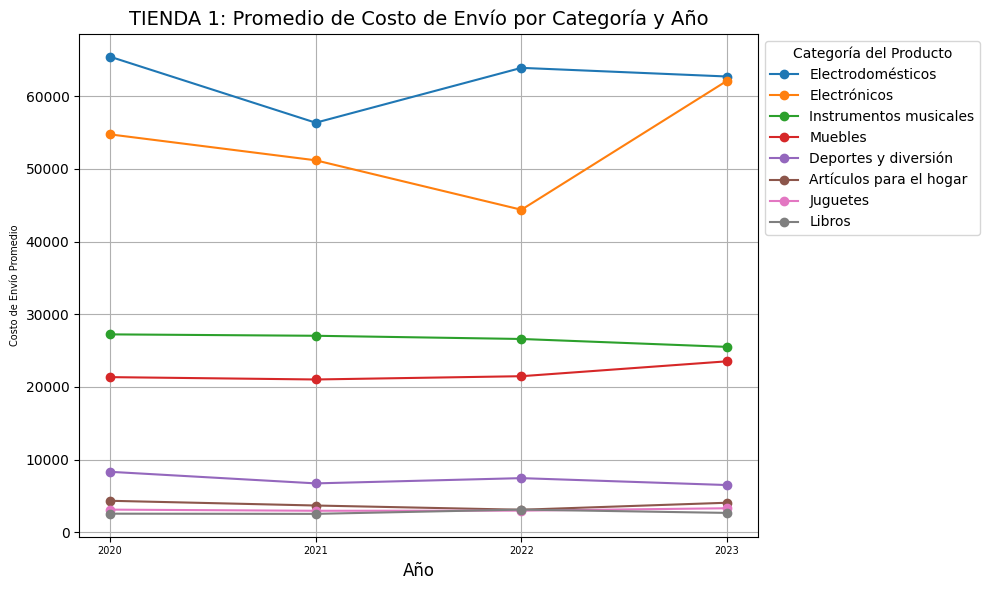

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Fecha de Compra' to datetime format
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

# Extract 'Año' from 'Fecha de Compra'
tienda['Año'] = tienda['Fecha de Compra'].dt.year

# Group by 'Año' and 'Categoría del Producto' to calculate the average 'Costo de envío'
calificacion_promedio_tienda1 = tienda.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()

# Calculate the total average for each 'Categoría del Producto'
total_promedio_categoria = calificacion_promedio_tienda1.groupby('Categoría del Producto')['Costo de envío'].sum().sort_values(ascending=False)

# Create the timeline chart
plt.figure(figsize=(10, 6))

# Plot each product category's timeline in sorted order
for categoria in total_promedio_categoria.index:
    data = calificacion_promedio_tienda1[calificacion_promedio_tienda1['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Costo de envío'], marker='o', label=categoria)

# Add labels, title, and sorted legend
plt.title('TIENDA 1: Promedio de Costo de Envío por Categoría y Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=7)
plt.xticks(calificacion_promedio_tienda1['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)

# Move the legend outside of the chart
plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement

# Adjust the layout to fit the chart and legend
plt.tight_layout()

# Show the chart
plt.show()

In [22]:
import pandas as pd
import numpy as np


tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
tienda2['Año'] = tienda2['Fecha de Compra'].dt.year
calificacion_promedio_tienda2=tienda2.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()
calificacion_promedio_tienda2 = calificacion_promedio_tienda2.sort_values(by= ['Año', 'Costo de envío'], ascending=[True, False])

calificacion_promedio_tienda2['Costo de envío']= calificacion_promedio_tienda2['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
print('TIENDA 2')
calificacion_promedio_tienda2

TIENDA 2


,Año,Categoría del Producto,Costo de envío
2,2020,Electrodomésticos,"62,954"
3,2020,Electrónicos,"48,117"
4,2020,Instrumentos musicales,"23,692"
7,2020,Muebles,"22,289"
1,2020,Deportes y diversión,"7,468"
0,2020,Artículos para el hogar,"4,620"
6,2020,Libros,"3,204"
5,2020,Juguetes,"2,440"
10,2021,Electrodomésticos,"61,063"
11,2021,Electrónicos,"48,333"


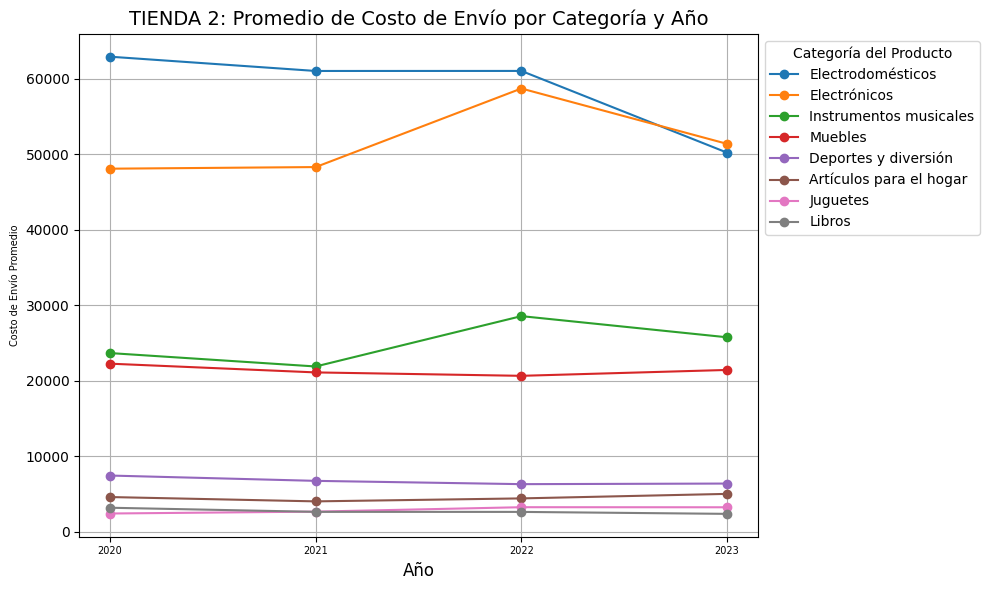

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)

tienda2['Año'] = tienda2['Fecha de Compra'].dt.year


calificacion_promedio_tienda2 = tienda2.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()


total_promedio_categoria = calificacion_promedio_tienda2.groupby('Categoría del Producto')['Costo de envío'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))


for categoria in total_promedio_categoria.index:
    data = calificacion_promedio_tienda2[calificacion_promedio_tienda2['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Costo de envío'], marker='o', label=categoria)


plt.title('TIENDA 2: Promedio de Costo de Envío por Categoría y Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=7)
plt.xticks(calificacion_promedio_tienda2['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement

plt.tight_layout()


plt.show()

In [24]:
import pandas as pd
import numpy as np


tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year
calificacion_promedio_tienda3=tienda3.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()
calificacion_promedio_tienda3 = calificacion_promedio_tienda3.sort_values(by= ['Año', 'Costo de envío'], ascending=[True, False])

calificacion_promedio_tienda3['Costo de envío']= calificacion_promedio_tienda3['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
print('TIENDA 3')
calificacion_promedio_tienda3

TIENDA 3


,Año,Categoría del Producto,Costo de envío
2,2020,Electrodomésticos,"58,838"
3,2020,Electrónicos,"51,312"
7,2020,Muebles,"21,641"
4,2020,Instrumentos musicales,"20,827"
1,2020,Deportes y diversión,"6,033"
0,2020,Artículos para el hogar,"3,849"
5,2020,Juguetes,"3,048"
6,2020,Libros,"2,632"
10,2021,Electrodomésticos,"64,404"
11,2021,Electrónicos,"47,850"


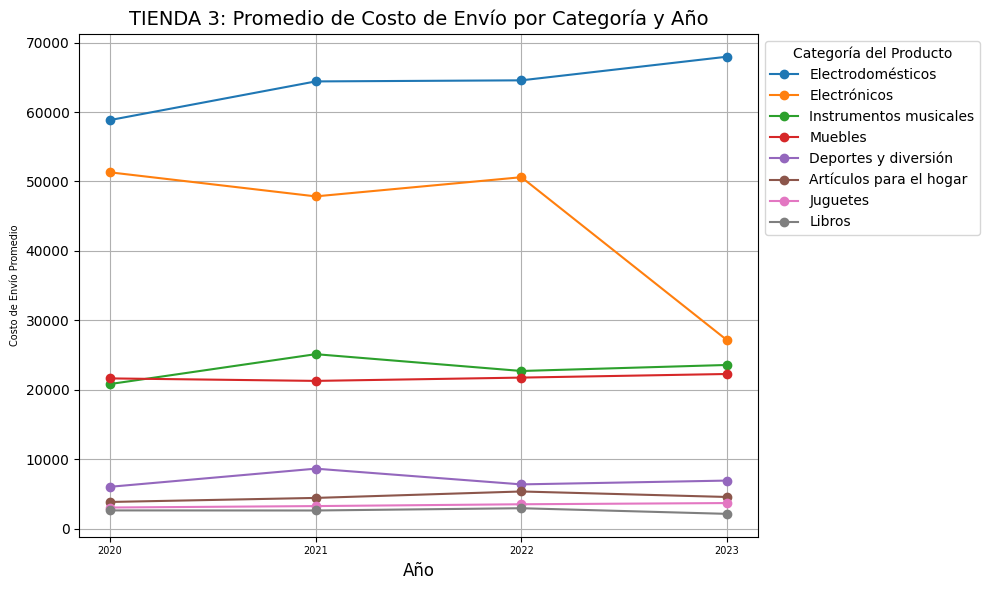

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)

tienda3['Año'] = tienda3['Fecha de Compra'].dt.year


calificacion_promedio_tienda3 = tienda3.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()


total_promedio_categoria = calificacion_promedio_tienda3.groupby('Categoría del Producto')['Costo de envío'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6)) # se crea el gráfico de línea de tiempo


for categoria in total_promedio_categoria.index: # Traza la línea de tiempo de cada categoría de productos en orden clasificado.
    data = calificacion_promedio_tienda3[calificacion_promedio_tienda3['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Costo de envío'], marker='o', label=categoria)


# Agrega etiquetas, título y leyenda ordenada
plt.title('TIENDA 3: Promedio de Costo de Envío por Categoría y Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=7)
plt.xticks(calificacion_promedio_tienda3['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


# Mover la leyenda afuera del gráfico
plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement


# Ajuste el diseño para ajustar el gráfico y la leyenda
plt.tight_layout()


plt.show()

In [26]:
import pandas as pd
import numpy as np


tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year
calificacion_promedio_tienda4=tienda4.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()
calificacion_promedio_tienda4 = calificacion_promedio_tienda4.sort_values(by= ['Año', 'Costo de envío'], ascending=[True, False])

calificacion_promedio_tienda4['Costo de envío']= calificacion_promedio_tienda4['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
print('TIENDA 4')
calificacion_promedio_tienda4

TIENDA 4


,Año,Categoría del Producto,Costo de envío
2,2020,Electrodomésticos,"58,105"
3,2020,Electrónicos,"50,166"
4,2020,Instrumentos musicales,"21,455"
7,2020,Muebles,"21,059"
1,2020,Deportes y diversión,"7,052"
0,2020,Artículos para el hogar,"4,242"
5,2020,Juguetes,"3,584"
6,2020,Libros,"2,922"
10,2021,Electrodomésticos,"61,766"
11,2021,Electrónicos,"51,684"


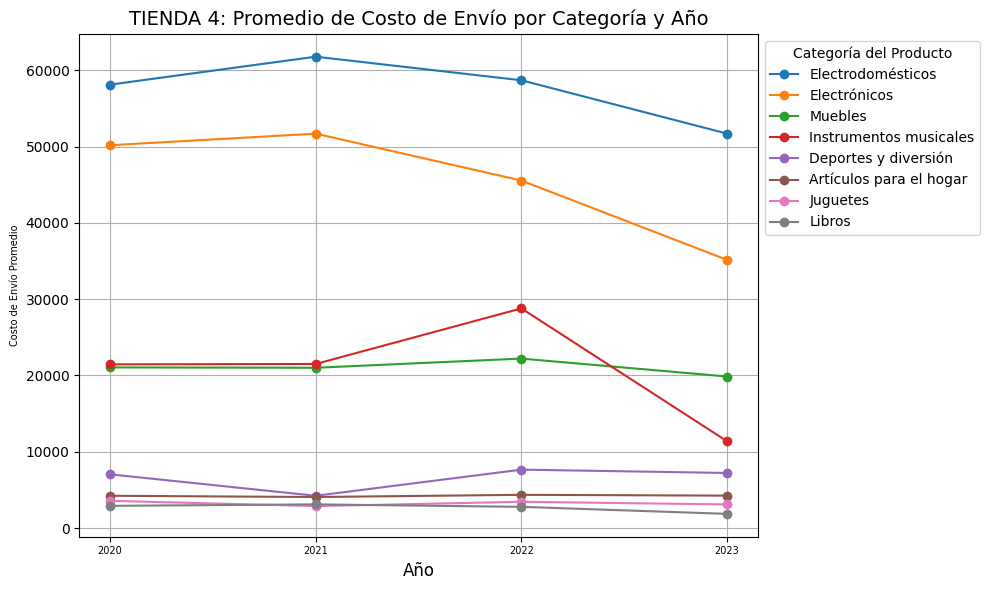

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)

tienda4['Año'] = tienda4['Fecha de Compra'].dt.year


calificacion_promedio_tienda4 = tienda4.groupby(['Año', 'Categoría del Producto'])['Costo de envío'].mean().round(2).reset_index()


total_promedio_categoria = calificacion_promedio_tienda4.groupby('Categoría del Producto')['Costo de envío'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6)) # se crea el gráfico de línea de tiempo


for categoria in total_promedio_categoria.index: # Traza la línea de tiempo de cada categoría de productos en orden clasificado.
    data = calificacion_promedio_tienda4[calificacion_promedio_tienda4['Categoría del Producto'] == categoria]
    plt.plot(data['Año'], data['Costo de envío'], marker='o', label=categoria)


# Agrega etiquetas, título y leyenda ordenada
plt.title('TIENDA 4: Promedio de Costo de Envío por Categoría y Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=7)
plt.xticks(calificacion_promedio_tienda3['Año'].unique(), fontsize=7)
plt.yticks(fontsize=10)
plt.grid(True)


# Mover la leyenda afuera del gráfico
plt.legend(title='Categoría del Producto', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted for outside placement


# Ajuste el diseño para ajustar el gráfico y la leyenda
plt.tight_layout()


plt.show()

In [28]:
import pandas as pd
import numpy as np

Prom_Costo_envio_tienda1 = tienda.groupby('Categoría del Producto')['Costo de envío'].mean().reset_index().round(2)
Prom_Costo_envio_tienda1 = Prom_Costo_envio_tienda1.sort_values(by= 'Costo de envío', ascending=False)
Prom_Costo_envio_tienda1['Costo de envío']= Prom_Costo_envio_tienda1['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
Prom_Costo_envio_tienda2 = tienda2.groupby('Categoría del Producto')['Costo de envío'].mean().reset_index().round(2)
Prom_Costo_envio_tienda2 = Prom_Costo_envio_tienda2.sort_values(by='Costo de envío',ascending=False)
Prom_Costo_envio_tienda2['Costo de envío'] = Prom_Costo_envio_tienda2['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
Prom_Costo_envio_tienda3 = tienda3.groupby('Categoría del Producto')['Costo de envío'].mean().reset_index().round(2)
Prom_Costo_envio_tienda3  = Prom_Costo_envio_tienda3.sort_values(by='Costo de envío',ascending=False)
Prom_Costo_envio_tienda3['Costo de envío'] = Prom_Costo_envio_tienda3['Costo de envío'].apply(lambda x: "{:,}".format(int(x)))
Prom_Costo_envio_tienda4 = tienda4.groupby('Categoría del Producto')['Costo de envío'].mean().reset_index().round(2)
Prom_Costo_envio_tienda4 = Prom_Costo_envio_tienda4.sort_values(by='Costo de envío',ascending=False)
Prom_Costo_envio_tienda4['Costo de envío'] = Prom_Costo_envio_tienda4['Costo de envío'].apply(lambda x: "{:,}".format(int(int(x))))

print(f'\nTIENDA 1\n {Prom_Costo_envio_tienda1}')
print(f'\nTIENDA 2\n {Prom_Costo_envio_tienda2}')
print(f'\nTIENDA 3\n {Prom_Costo_envio_tienda3}')
print(f'\nTIENDA 4\n {Prom_Costo_envio_tienda4}')


TIENDA 1
     Categoría del Producto Costo de envío
2        Electrodomésticos         61,935
3             Electrónicos         51,258
4   Instrumentos musicales         26,834
7                  Muebles         21,494
1     Deportes y diversión          7,468
0  Artículos para el hogar          3,764
5                 Juguetes          3,023
6                   Libros          2,699

TIENDA 2
     Categoría del Producto Costo de envío
2        Electrodomésticos         60,838
3             Electrónicos         51,692
4   Instrumentos musicales         24,811
7                  Muebles         21,348
1     Deportes y diversión          6,826
0  Artículos para el hogar          4,424
5                 Juguetes          2,835
6                   Libros          2,821

TIENDA 3
     Categoría del Producto Costo de envío
2        Electrodomésticos         62,928
3             Electrónicos         48,460
4   Instrumentos musicales         23,213
7                  Muebles         21,611
1

In [29]:
print('ANÁLISIS DEL COSTO PROMEDIO DE ENVÍO POR TIENDA\n')
print('La tendencia en incurrir en mayores costos de envío son los electrodomésticos ')
print('y electrónicos. En cambio, los libros se incurre en menos costos de envío.\n')
print('En el 2020 la tienda 1 incurrió en más costos de envío promediando $ 27,617.')
print('En el 2021 la tienda 3 incurrió en el mayor costos de envío promediando $ 26,196.')
print('En el 2022 la tienda 2 incurrió en el mayor costo de envío promediando $ 26,970.')

print('Hasta marzo de 2023 la tienda 1 ha incurrido con un mayor costo de envío promediando $ 28.905.\n')
print('La tienda 1 disminuyó sus costos de envío en el 2020,2021 y 2022.')
print('La tienda 2 aumentó sus costos de envío en el 2020, 2021 y  2022.')

print('La tienda 3 y la tienda 4 aumentaron sus costos de envío en el 2021, disminuyendo en el 2022.\n')
print('En los tres años la tienda 1 ha incurrido en un mayor costo promedio de envío $ 26,019. Los sigue :la tienda 2 con $25,216, la tienda 3 con $ 24,806 y la tienda 4 con $ 23,459.')

ANÁLISIS DEL COSTO PROMEDIO DE ENVÍO POR TIENDA

La tendencia en incurrir en mayores costos de envío son los electrodomésticos 
y electrónicos. En cambio, los libros se incurre en menos costos de envío.

En el 2020 la tienda 1 incurrió en más costos de envío promediando $ 27,617.
En el 2021 la tienda 3 incurrió en el mayor costos de envío promediando $ 26,196.
En el 2022 la tienda 2 incurrió en el mayor costo de envío promediando $ 26,970.
Hasta marzo de 2023 la tienda 1 ha incurrido con un mayor costo de envío promediando $ 28.905.

La tienda 1 disminuyó sus costos de envío en el 2020,2021 y 2022.
La tienda 2 aumentó sus costos de envío en el 2020, 2021 y  2022.
La tienda 3 y la tienda 4 aumentaron sus costos de envío en el 2021, disminuyendo en el 2022.

En los tres años la tienda 1 ha incurrido en un mayor costo promedio de envío $ 26,019. Los sigue :la tienda 2 con $25,216, la tienda 3 con $ 24,806 y la tienda 4 con $ 23,459.


**6.  DESAFÍO EXTRA**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna "Fecha de Compra" a datetime (día primero)
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

# Extraer el año de la fecha de compra
tienda['Año'] = tienda['Fecha de Compra'].dt.year

# Agrupar y sumar 'Precio' por Año, Lugar de Compra, lat y lon
ventas_por_categoria_tienda1 = tienda.groupby(['Año', 'Lugar de Compra', 'lat', 'lon'])['Precio'].sum().reset_index()

# Renombrar la columna 'Precio' a 'Ingresos_por_ventas1'
ventas_por_categoria_tienda1 = ventas_por_categoria_tienda1.rename(columns={'Precio': 'Ingresos_por_ventas1'})

# Usar ventas_por_categoria_tienda1 como base para merged_data y ordenarlo
merged_data = ventas_por_categoria_tienda1.sort_values(by=['Año', 'Ingresos_por_ventas1'], ascending=[True, False])


lista_dfs = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_value = year_data['Ingresos_por_ventas1'].sum()
    total_row = pd.DataFrame({
        'Año': [year],
        'Lugar de Compra': ['Total'],              # Esta fila indica el total para el año.
        'lat': [np.nan],                           # np.nan mantiene la columna numérica.
        'lon': [np.nan],
        'Ingresos_por_ventas1': [total_value]
    })
    # Concatenar los datos del año con la fila total
    lista_dfs.append(pd.concat([year_data, total_row], ignore_index=True))

final_data = pd.concat(lista_dfs, ignore_index=True)

# Opcional: Formatear la columna de ingresos para visualización (esto la convierte en string con separadores de miles).
final_data['Ingresos_por_ventas1'] = final_data['Ingresos_por_ventas1'].apply(
    lambda x: "{:,}".format(int(x)) if pd.notnull(x) and not np.isnan(x) else x
)

# Seleccionar las columnas de interés
final_data = final_data[['Año', 'Lugar de Compra', 'lat', 'lon', 'Ingresos_por_ventas1']]

# Mostrar la tabla final
print('\nTIENDA 1\n')
(final_data)


TIENDA 1



,Año,Lugar de Compra,lat,lon,Ingresos_por_ventas1
0,2020,Bogotá,4.60971,-74.08175,"143,234,100"
1,2020,Medellín,6.25184,-75.56359,"82,529,700"
2,2020,Cali,3.43722,-76.52250,"56,280,000"
3,2020,Barranquilla,10.96854,-74.78132,"18,539,100"
4,2020,Pereira,4.81333,-75.69611,"13,229,600"
...,...,...,...,...,...
68,2023,Inírida,3.86530,-67.92390,"679,000"
69,2023,Barranquilla,10.96854,-74.78132,"425,300"
70,2023,Pasto,1.21361,-77.28111,"105,700"
71,2023,Cartagena,10.39972,-75.51444,"52,100"


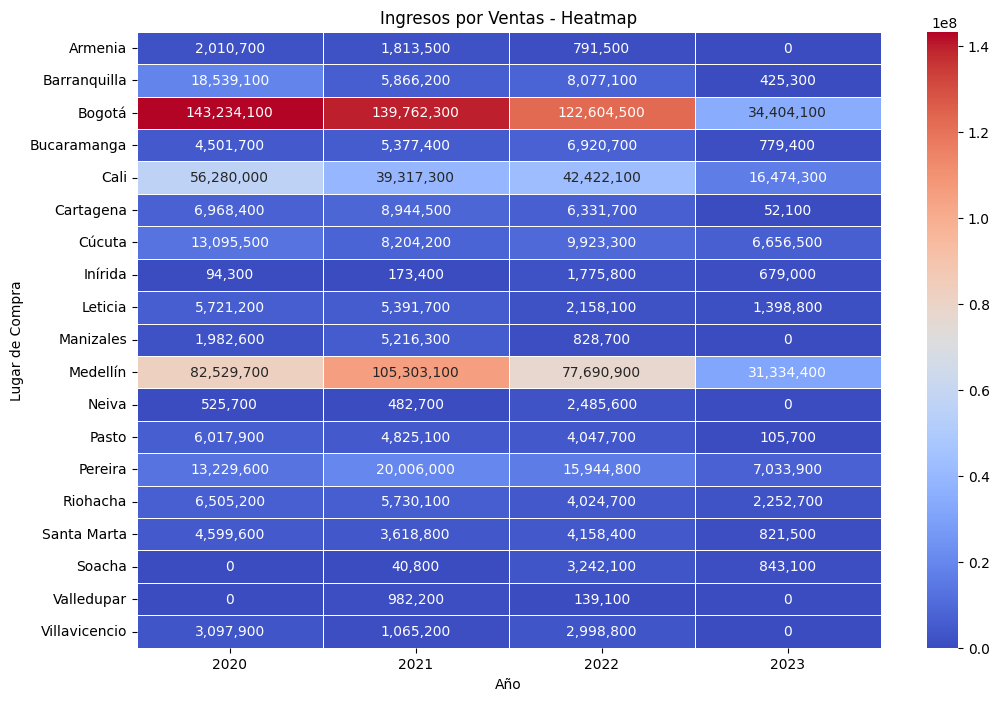

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_df = final_data[final_data['Lugar de Compra'] != 'Total'].copy()


heatmap_df['Ingresos_por_ventas1'] = pd.to_numeric(
    heatmap_df['Ingresos_por_ventas1'].str.replace(',', ''),
    errors='coerce'
)


heatmap_pivot = heatmap_df.pivot_table(
    index='Lugar de Compra',
    columns='Año',
    values='Ingresos_por_ventas1',
    aggfunc='sum'
)

# Opcional: Rellenar posibles NaN con 0 para evitar celdas vacías
heatmap_pivot = heatmap_pivot.fillna(0)

# Graficar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=",.0f", cmap="coolwarm", linewidths=0.5)
plt.title('Ingresos por Ventas - Heatmap')
plt.xlabel('Año')
plt.ylabel('Lugar de Compra')  # Aquí se muestran las ciudades reales
plt.show()

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna "Fecha de Compra" a datetime (día primero)
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)

# Extraer el año de la fecha de compra
tienda2['Año'] = tienda2['Fecha de Compra'].dt.year

# Agrupar y sumar 'Precio' por Año, Lugar de Compra, lat y lon
ventas_por_categoria_tienda2 = tienda2.groupby(['Año', 'Lugar de Compra', 'lat', 'lon'])['Precio'].sum().reset_index()

# Renombrar la columna 'Precio' a 'Ingresos_por_ventas2'
ventas_por_categoria_tienda2 = ventas_por_categoria_tienda2.rename(columns={'Precio': 'Ingresos_por_ventas2'})

# Usar ventas_por_categoria_tienda2 como base para merged_data y ordenarlo
merged_data = ventas_por_categoria_tienda2.sort_values(by=['Año', 'Ingresos_por_ventas2'], ascending=[True, False])


lista_dfs = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_value = year_data['Ingresos_por_ventas2'].sum()
    total_row = pd.DataFrame({
        'Año': [year],
        'Lugar de Compra': ['Total'],              # Esta fila indica el total para el año.
        'lat': [np.nan],                           # np.nan mantiene la columna numérica.
        'lon': [np.nan],
        'Ingresos_por_ventas2': [total_value]
    })
    # Concatenar los datos del año con la fila total
    lista_dfs.append(pd.concat([year_data, total_row], ignore_index=True))

final_data = pd.concat(lista_dfs, ignore_index=True)

# Opcional: Formatear la columna de ingresos para visualización (esto la convierte en string con separadores de miles).
final_data['Ingresos_por_ventas2'] = final_data['Ingresos_por_ventas2'].apply(
    lambda x: "{:,}".format(int(x)) if pd.notnull(x) and not np.isnan(x) else x
)

# Seleccionar las columnas de interés
final_data = final_data[['Año', 'Lugar de Compra', 'lat', 'lon', 'Ingresos_por_ventas2']]

# Mostrar la tabla final
print('\nTIENDA 2\n')
(final_data)


TIENDA 2



,Año,Lugar de Compra,lat,lon,Ingresos_por_ventas2
0,2020,Bogotá,4.60971,-74.08175,"141,428,000"
1,2020,Medellín,6.25184,-75.56359,"75,631,400"
2,2020,Cali,3.43722,-76.52250,"43,116,200"
3,2020,Pereira,4.81333,-75.69611,"13,851,400"
4,2020,Cúcuta,7.89391,-72.50782,"11,266,000"
...,...,...,...,...,...
67,2023,Valledupar,10.46314,-73.25322,"238,600"
68,2023,Pasto,1.21361,-77.28111,"196,500"
69,2023,Cúcuta,7.89391,-72.50782,"107,700"
70,2023,Armenia,4.53389,-75.68111,"31,700"


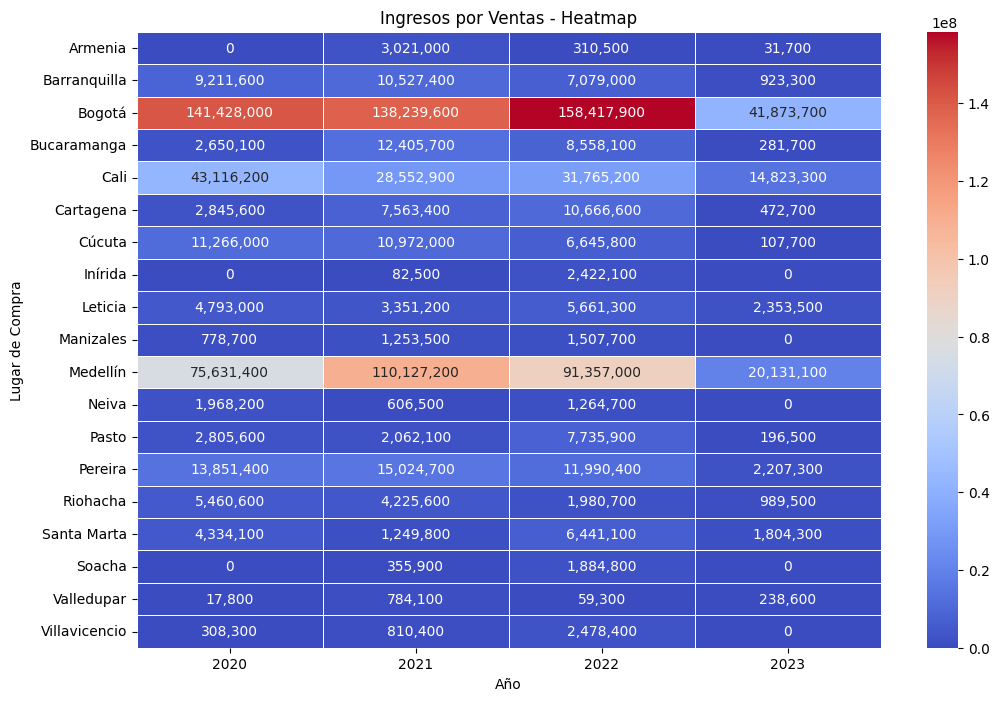

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_df = final_data[final_data['Lugar de Compra'] != 'Total'].copy()


heatmap_df['Ingresos_por_ventas2'] = pd.to_numeric(
    heatmap_df['Ingresos_por_ventas2'].str.replace(',', ''),
    errors='coerce'
)


heatmap_pivot = heatmap_df.pivot_table(
    index='Lugar de Compra',
    columns='Año',
    values='Ingresos_por_ventas2',
    aggfunc='sum'
)

# Opcional: Rellenar posibles NaN con 0 para evitar celdas vacías
heatmap_pivot = heatmap_pivot.fillna(0)

# Graficar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=",.0f", cmap="coolwarm", linewidths=0.5)
plt.title('Ingresos por Ventas - Heatmap')
plt.xlabel('Año')
plt.ylabel('Lugar de Compra')  # Aquí se muestran las ciudades reales
plt.show()

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna "Fecha de Compra" a datetime (día primero)
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)

# Extraer el año de la fecha de compra
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year

# Agrupar y sumar 'Precio' por Año, Lugar de Compra, lat y lon
ventas_por_categoria_tienda3 = tienda3.groupby(['Año', 'Lugar de Compra', 'lat', 'lon'])['Precio'].sum().reset_index()

# Renombrar la columna 'Precio' a 'Ingresos_por_ventas4'
ventas_por_categoria_tienda3 = ventas_por_categoria_tienda3.rename(columns={'Precio': 'Ingresos_por_ventas3'})

# Usar ventas_por_categoria_tienda4 como base para merged_data y ordenarlo
merged_data = ventas_por_categoria_tienda3.sort_values(by=['Año', 'Ingresos_por_ventas3'], ascending=[True, False])


lista_dfs = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_value = year_data['Ingresos_por_ventas3'].sum()
    total_row = pd.DataFrame({
        'Año': [year],
        'Lugar de Compra': ['Total'],              # Esta fila indica el total para el año.
        'lat': [np.nan],                           # np.nan mantiene la columna numérica.
        'lon': [np.nan],
        'Ingresos_por_ventas3': [total_value]
    })
    # Concatenar los datos del año con la fila total
    lista_dfs.append(pd.concat([year_data, total_row], ignore_index=True))

final_data = pd.concat(lista_dfs, ignore_index=True)

# Opcional: Formatear la columna de ingresos para visualización (esto la convierte en string con separadores de miles).
final_data['Ingresos_por_ventas3'] = final_data['Ingresos_por_ventas3'].apply(
    lambda x: "{:,}".format(int(x)) if pd.notnull(x) and not np.isnan(x) else x
)

# Seleccionar las columnas de interés
final_data = final_data[['Año', 'Lugar de Compra', 'lat', 'lon', 'Ingresos_por_ventas3']]

# Mostrar la tabla final
print('\nTIENDA 3\n')
(final_data)


TIENDA 3



,Año,Lugar de Compra,lat,lon,Ingresos_por_ventas3
0,2020,Bogotá,4.60971,-74.08175,"147,736,500"
1,2020,Medellín,6.25184,-75.56359,"64,394,200"
2,2020,Cali,3.43722,-76.52250,"34,368,800"
3,2020,Pereira,4.81333,-75.69611,"17,125,900"
4,2020,Barranquilla,10.96854,-74.78132,"9,950,300"
...,...,...,...,...,...
67,2023,Cartagena,10.39972,-75.51444,"813,100"
68,2023,Leticia,-4.21528,-69.94056,"578,900"
69,2023,Riohacha,11.54444,-72.90722,"330,200"
70,2023,Villavicencio,4.14200,-73.62664,"122,400"


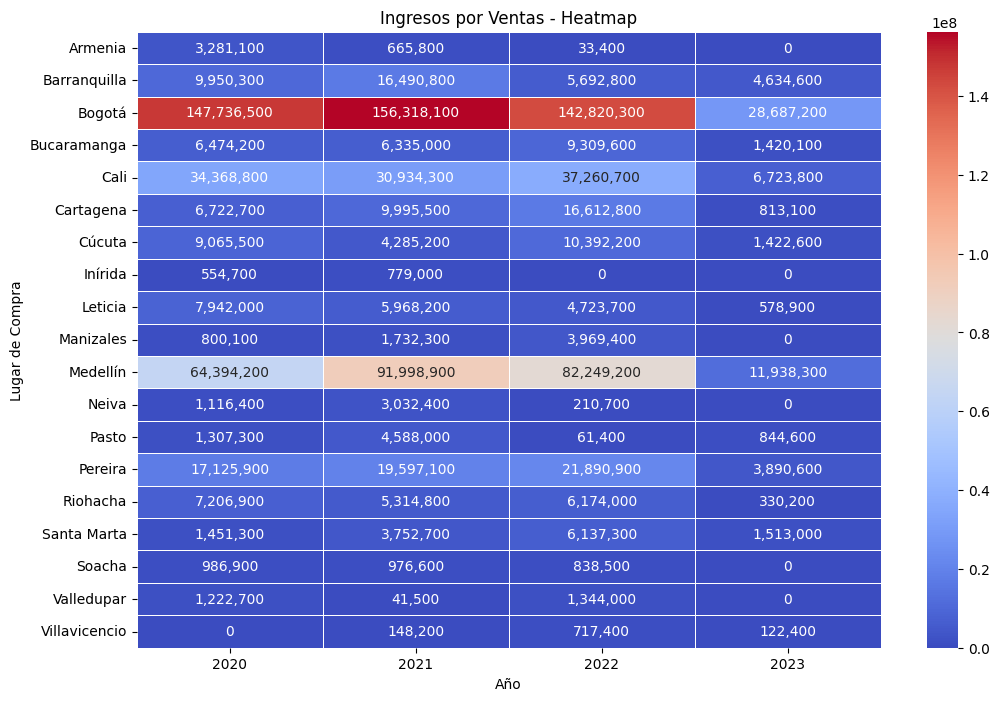

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_df = final_data[final_data['Lugar de Compra'] != 'Total'].copy()


heatmap_df['Ingresos_por_ventas3'] = pd.to_numeric(
    heatmap_df['Ingresos_por_ventas3'].str.replace(',', ''),
    errors='coerce'
)


heatmap_pivot = heatmap_df.pivot_table(
    index='Lugar de Compra',
    columns='Año',
    values='Ingresos_por_ventas3',
    aggfunc='sum'
)

# Opcional: Rellenar posibles NaN con 0 para evitar celdas vacías
heatmap_pivot = heatmap_pivot.fillna(0)

# Graficar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=",.0f", cmap="coolwarm", linewidths=0.5)
plt.title('Ingresos por Ventas - Heatmap')
plt.xlabel('Año')
plt.ylabel('Lugar de Compra')  # Aquí se muestran las ciudades reales
plt.show()

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna "Fecha de Compra" a datetime (día primero)
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)

# Extraer el año de la fecha de compra
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year

# Agrupar y sumar 'Precio' por Año, Lugar de Compra, lat y lon
ventas_por_categoria_tienda4 = tienda4.groupby(['Año', 'Lugar de Compra', 'lat', 'lon'])['Precio'].sum().reset_index()

# Renombrar la columna 'Precio' a 'Ingresos_por_ventas4'
ventas_por_categoria_tienda4 = ventas_por_categoria_tienda4.rename(columns={'Precio': 'Ingresos_por_ventas4'})

# Usar ventas_por_categoria_tienda4 como base para merged_data y ordenarlo
merged_data = ventas_por_categoria_tienda4.sort_values(by=['Año', 'Ingresos_por_ventas4'], ascending=[True, False])


lista_dfs = []
for year in merged_data['Año'].unique():
    year_data = merged_data[merged_data['Año'] == year]
    total_value = year_data['Ingresos_por_ventas4'].sum()
    total_row = pd.DataFrame({
        'Año': [year],
        'Lugar de Compra': ['Total'],              # Esta fila indica el total para el año.
        'lat': [np.nan],                           # np.nan mantiene la columna numérica.
        'lon': [np.nan],
        'Ingresos_por_ventas4': [total_value]
    })
    # Concatenar los datos del año con la fila total
    lista_dfs.append(pd.concat([year_data, total_row], ignore_index=True))

final_data = pd.concat(lista_dfs, ignore_index=True)

# Opcional: Formatear la columna de ingresos para visualización (esto la convierte en string con separadores de miles).
final_data['Ingresos_por_ventas4'] = final_data['Ingresos_por_ventas4'].apply(
    lambda x: "{:,}".format(int(x)) if pd.notnull(x) and not np.isnan(x) else x
)

# Seleccionar las columnas de interés
final_data = final_data[['Año', 'Lugar de Compra', 'lat', 'lon', 'Ingresos_por_ventas4']]

# Mostrar la tabla final
print('\nTIENDA 4\n')
(final_data)



TIENDA 4



,Año,Lugar de Compra,lat,lon,Ingresos_por_ventas4
0,2020,Bogotá,4.60971,-74.08175,"138,585,600"
1,2020,Medellín,6.25184,-75.56359,"85,476,900"
2,2020,Cali,3.43722,-76.52250,"23,612,000"
3,2020,Pereira,4.81333,-75.69611,"19,316,200"
4,2020,Barranquilla,10.96854,-74.78132,"11,103,300"
...,...,...,...,...,...
66,2023,Pasto,1.21361,-77.28111,"255,700"
67,2023,Neiva,2.92730,-75.28189,"238,900"
68,2023,Armenia,4.53389,-75.68111,"193,400"
69,2023,Cúcuta,7.89391,-72.50782,"47,400"


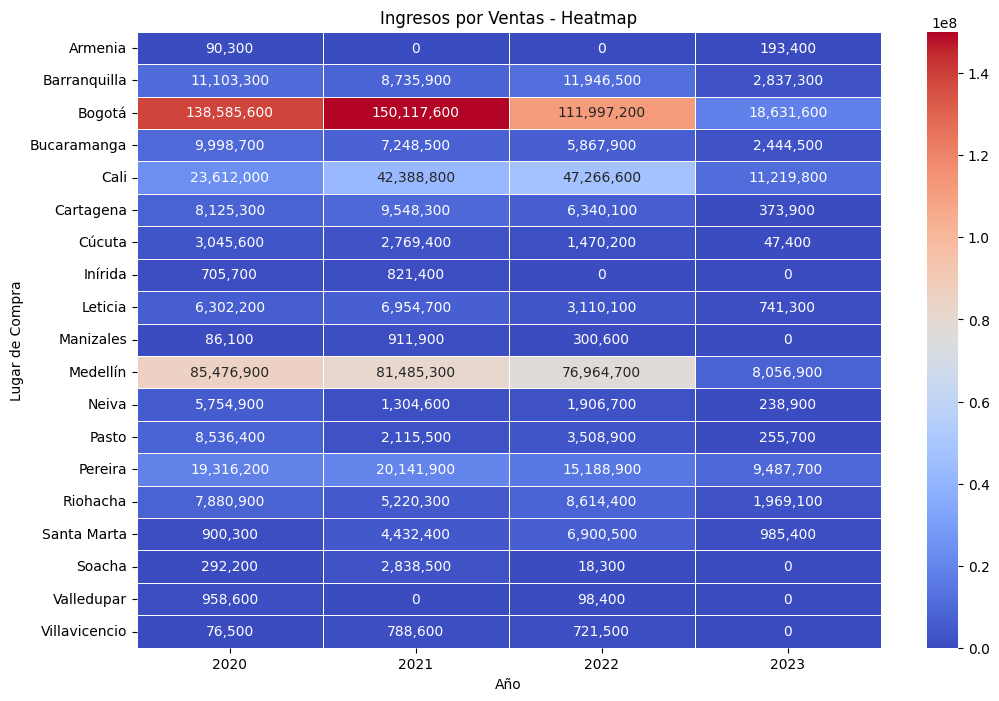

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_df = final_data[final_data['Lugar de Compra'] != 'Total'].copy()


heatmap_df['Ingresos_por_ventas4'] = pd.to_numeric(
    heatmap_df['Ingresos_por_ventas4'].str.replace(',', ''),
    errors='coerce'
)


heatmap_pivot = heatmap_df.pivot_table(
    index='Lugar de Compra',
    columns='Año',
    values='Ingresos_por_ventas4',
    aggfunc='sum'
)

# Opcional: Rellenar posibles NaN con 0 para evitar celdas vacías
heatmap_pivot = heatmap_pivot.fillna(0)

# Graficar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=",.0f", cmap="coolwarm", linewidths=0.5)
plt.title('Ingresos por Ventas - Heatmap')
plt.xlabel('Año')
plt.ylabel('Lugar de Compra')  # Aquí se muestran las ciudades reales
plt.show()

**7.  CONCLUSIÓN**






**ANÁLIS FINAL**

**FORTALEZAS:**

**TIENDA 1:** El  ingreso  acumulado  durante  los 3  años es  mayor  que las  otras  tiendas. El precio promedio unitario de las ventas por categorías  del  producto  tales como los electrodomésticos y electrónicos,  es en algunos  casos mas alto que las  otras tiendas, logrando el porcentaje  más alto  26.57% de
los ingresos totales  de las  tiendas, además que en algunas categorías han logrado vender más a mejor precio. En el 2023 es la que presenta mayor venta e ingresos por venta alrededor de un 33,3% de total de las tiendas, como también el costo de envío subió un 33,6%.

**TIENDA 2:** El ingreso ha ido en aumento año a año, pero no ha logrado superar el ingreso total de la tienda 1. Las ventas por categorías también son buenas ya que logra vender más en algunos productos aunque el precio promedio no sea más alto que las otras tiendas. Los artículos electrónicos  tiene un precio  promedio
unitario más  alto que las otras tiendas. Comparándolo a la primera tienda presenta una disminución de un 3% de los ingresos totales de las tiendas. En el 2023  es la segunda  que presenta más venta e ingresos por venta  alrededor del 27,9% de total  de las tiendas como también el costo de envío fue un 27,9%.

**TIENDA 3:** Las ventas  por categorías también  son buenas  ya que  logra vender más en algunos productos en que su precio promedio unitario es alto. Comparándolo con la primera tienda presenta una disminución de un 4,6% del total de los ingresos de las tiendas. En el 2023 es la tercera que presenta más ventas
e ingresos por ventas aldededor del 20% del total de las tiendas, el costo de envío también aumenta en un 20%. En el 2023 la calificación promedio se mantuvo en
4.08.

**TIENDA 4:** La calificación promedio en el 2023 subió al 4.17.

**DEBILIDADES**

**TIENDA 1:** La calificación fue aumentando año a año pero su promedio total es el más bajo de las 4 tiendas 3.98. En el 2023 tiene la calificación más baja 3.96.

**TIENDA 2:** En el 2023 tiene la calificación más baja 3.96.

**TIENDA 4:** El precio promedio unitario es más bajo en los electrodomésticos y electrónicos,los ingresos por venta es alrededor del 9,7% menos que la tienda 1  durante los 3 años. Los costos de envío son  menores debido a que tiene menos  ventas. Comparando las tiendas en el 2023, es la que presenta menos ventas y  menos ingresos alrededor del 18,5% de la suma de las 4 tiendas. el costo de envío también aumenta un 18,4%.
La calificación  fue disminuyendo  año a año, pero su promedio total es 4.

Los mayores ingresos por ventas provienen de las ciudades de Bogotá y Medellin.

***MAYORES INGRESOS POR VENTAS POR PERIODO***

FECHA    -   TIENDA -   CIUDAD
- 2020      -     3   -    BOGOTÁ  
- 2020      -     4   -    MEDELLÍN  
- 2021      -     2   -    MEDELLÍN  
- 2021      -     3   -    BOGOTÁ
- 2022      -     2   -    MEDELLÍN Y BOGOTÁ
- 2023      -     2   -    BOGOTÁ
- 2023      -     1   -    MEDELLÍN

La tienda 1 logra vender más, en la suma de los ingresos en otras ciudades, en el año 2020, 2021, 2023.
La tienda 2 logra vender más, en la suma de los ingresos en otras ciudades, en el año 2022.

Con los  antecedentes que se tienen a disposición  es muy  difícil saber con certeza  que tienda   debería cerrar ya que no se cuenta con los otros costos operacionales, los gastos administrativos ni los gastos generales, que darían una idea más clara cual tienda incurre en más costos y gastos, y cual es menos  competitiva.
Los costos de  envío son  directamente proporcionales a los ingresos por ventas obtenidos en cada una de las tiendas.Las cuatro tiendas tienen una calificación  alrededor de 4, que va variando en unas pocas décimas dependiendo de la categoría del producto. Por zona geográfica la tienda 4 es la que vende menos.
Con los datos entregados cerraría la  tienda 4, ya que dentro de los 3 años es la que ha tenido menos ingresos por ventas y su calificación no supera con creces a las otras tiendas.


  


